<a href="https://colab.research.google.com/github/niklaust/Data_Science/blob/main/Data_Science_from_Scratch_notebook_of_niklaust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reference**
Joel Grus. (2019). *Data Science from Scratch, Second Edition*. O'Reilly

<h1><center><b>Data Science</b></center></h1>


github:niklaust

start 20221202

# <center><b>Chapter 1. Introduction</b></center>

**What is Data Science?**

**Data scientist** is someone who extracts insights from messy data.

**Data science is an intersection of:**

* Hacking skills
* Math and Statistics knowledge
* Substantive expertise

## **Finding Key Connectors**

In [ ]:
users = [
          { "id": 0, "name": "Hero" },
          { "id": 1, "name": "Dunn" },
          { "id": 2, "name": "Sue" },
          { "id": 3, "name": "Chi" },
          { "id": 4, "name": "Thor" },
          { "id": 5, "name": "Clive" },
          { "id": 6, "name": "Hicks" },
          { "id": 7, "name": "Devin" },
          { "id": 8, "name": "Kate" },
          { "id": 9, "name": "Klein" }
]

friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
                    (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [ ]:
# Initialize the dict with an empty list for each user id:
friendships = {user["id"]: [] for user in users}

print(friendships)

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}


In [ ]:
# And loop over the friendship pairs to populate it:         # bug keep adding if you run more than 1
for i, j in friendship_pairs:
  friendships[i].append(j)                   # Add j as a friend of user i
  friendships[j].append(i)                   # Add i as a friend of user j

print(friendships)

{0: [1, 2], 1: [0, 2, 3], 2: [0, 1, 3], 3: [1, 2, 4], 4: [3, 5], 5: [4, 6, 7], 6: [5, 8], 7: [5, 8], 8: [6, 7, 9], 9: [8]}


In [ ]:
for i, j in friendships.items():
  print("User {0}: {1}".format(i, [f for f in set(j)]))

User 0: [1, 2]
User 1: [0, 2, 3]
User 2: [0, 1, 3]
User 3: [1, 2, 4]
User 4: [3, 5]
User 5: [4, 6, 7]
User 6: [8, 5]
User 7: [8, 5]
User 8: [9, 6, 7]
User 9: [8]


In [ ]:
for i, j in friendships.items():
  print("{0}: ".format(users[i]['name']))
  [print("\t",users[f]['name']) for f in set(j)]

Hero: 
	 Dunn
	 Sue
Dunn: 
	 Hero
	 Sue
	 Chi
Sue: 
	 Hero
	 Dunn
	 Chi
Chi: 
	 Dunn
	 Sue
	 Thor
Thor: 
	 Chi
	 Clive
Clive: 
	 Thor
	 Hicks
	 Devin
Hicks: 
	 Kate
	 Clive
Devin: 
	 Kate
	 Clive
Kate: 
	 Klein
	 Hicks
	 Devin
Klein: 
	 Kate


In [ ]:
# count friends 

def number_of_friends(user):                        # { "id": 0, "name": "Hero" },
  """How many friends does _user_ have?"""
  user_id = user["id"]                              # user[0], user_id = 0
  friend_ids = friendships[user_id]                 # friendships[0],           |friendships = {0: [1, 2],.....
  return len(friend_ids)                            # len([1,2]), return 2


total_connections = sum(number_of_friends(user) for user in users) 

print(total_connections)

24


In [ ]:
num_users = len(users)                                                          # length of the users list
avg_connections = total_connections / num_users                                 # 24 / 10 == 2.

print(num_users)
print(avg_connections)

10
2.4


In [ ]:
# Create a list (user_id, number_of_friends).
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]

print(num_friends_by_id)

[(0, 2), (1, 3), (2, 3), (3, 3), (4, 2), (5, 3), (6, 2), (7, 2), (8, 3), (9, 1)]


In [ ]:
num_friends_by_id.sort(                                                         # Sort the list
                        key=lambda id_and_friends: id_and_friends[1],           # by num_friends
                        reverse=True)                                           # largest to smallest

print(num_friends_by_id)

[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]


### **Data Scientists You May Know**

In [ ]:
def foaf_ids_bad(user):
  """foaf is short for "friend of a friend" """
  return [foaf_id
          for friend_id in friendships[user["id"]]
          for foaf_id in friendships[friend_id]]

In [ ]:
print(friendships[0])
print(friendships[1])
print(friendships[2])
print(friendships[3])

[1, 2]
[0, 2, 3]
[0, 1, 3]
[1, 2, 4]


In [ ]:
from collections import Counter

def friends_of_friends(user):
  user_id = user["id"]
  return Counter(
      foaf_id
      for friend_id in friendships[user_id]   # For each of my friends, 
      for foaf_id in friendships[friend_id]   # find their friends
      if foaf_id != user_id                   # who aren't my
      and foaf_id not in friendships[user_id] # and aren't my friends.
  )

print(friends_of_friends(users[3]))

Counter({0: 2, 5: 1})


In [ ]:
interests = [
              (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
              (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
              (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
              (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
              (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
              (3, "statistics"), (3, "regression"), (3, "probability"),
              (4, "machine learning"), (4, "regression"), (4, "decision trees"),
              (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
              (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
              (6, "probability"), (6, "mathematics"), (6, "theory"),
              (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
              (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
              (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
              (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [ ]:
# fuction that finds users with a certain interest

def data_scientists_who_like(target_interest):
  """Find the ids of all users who like the target interest."""
  return [user_id
    for user_id, user_interest in interests
    if user_interest == target_interest]

In [ ]:
from collections import defaultdict

# Keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
  user_ids_by_interest[interest].append(user_id)

# Keys are user_ids, values are lists of interests for that user_id.
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
  interests_by_user_id[user_id].append(interest)

In [ ]:
def most_common_interests_with(user):
  return Counter(
    interested_user_id
    for interest in interests_by_user_id[user["id"]]
    for interested_user_id in user_ids_by_interest[interest]
    if interested_user_id != user["id"]
  )


## **Salaries and Experience**

In [ ]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

In [ ]:
# Keys are years, values are lists of the salaries for each tenure.
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
  salary_by_tenure[tenure].append(salary)

for tenure, salary in sorted(salary_by_tenure.items(), key=lambda item: item[0]):
  print(f"{tenure} :  {salary}")

0.7 :  [48000]
1.9 :  [48000]
2.5 :  [60000]
4.2 :  [63000]
6 :  [76000]
6.5 :  [69000]
7.5 :  [76000]
8.1 :  [88000]
8.7 :  [83000]
10 :  [83000]


In [ ]:
# Keys are years, each value is average salary for that tenure.
average_salary_by_tenure = {
                              tenure: sum(salaries) / len(salaries)
                              for tenure, salaries in salary_by_tenure.items()
}

print(average_salary_by_tenure)

{8.7: 83000.0, 8.1: 88000.0, 0.7: 48000.0, 6: 76000.0, 6.5: 69000.0, 7.5: 76000.0, 2.5: 60000.0, 10: 83000.0, 1.9: 48000.0, 4.2: 63000.0}


In [ ]:
def tenure_bucket(tenure):
  if tenure < 2:
    return "less than two"
  elif tenure < 5:
    return "between two and five"
  else:
    return "more than five"

In [ ]:
# Keys are tenure buckets, values are lists of salaries for that bucket.
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
  bucket = tenure_bucket(tenure)
  salary_by_tenure_bucket[bucket].append(salary)


In [ ]:
# Keys are tenure buckets, values are average salary for that bucket.
average_salary_by_bucket = {
                              tenure_bucket: sum(salaries) / len(salaries)
                              for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

print(average_salary_by_bucket)

{'more than five': 79166.66666666667, 'less than two': 48000.0, 'between two and five': 61500.0}


### **Paid Accounts**

In [ ]:
def predict_paid_or_unpaid(years_experience):
  if years_experience < 3.0:
    return "paid"
  elif years_experience < 8.5:
    return "unpaid"
  else:
    return "paid"

### **Topics of Interest**

In [ ]:
interests = [
            (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
            (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
            (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
            (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
            (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
            (3, "statistics"), (3, "regression"), (3, "probability"),
            (4, "machine learning"), (4, "regression"), (4, "decision trees"),
            (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
            (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
            (6, "probability"), (6, "mathematics"), (6, "theory"),
            (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
            (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
            (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
            (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]


In [ ]:
words_and_counts = Counter(word
                          for user, interest in interests
                          for word in interest.lower().split())


In [ ]:
print(words_and_counts)

Counter({'big': 3, 'data': 3, 'java': 3, 'python': 3, 'learning': 3, 'hadoop': 2, 'hbase': 2, 'cassandra': 2, 'scikit-learn': 2, 'r': 2, 'statistics': 2, 'regression': 2, 'probability': 2, 'machine': 2, 'neural': 2, 'networks': 2, 'spark': 1, 'storm': 1, 'nosql': 1, 'mongodb': 1, 'postgres': 1, 'scipy': 1, 'numpy': 1, 'statsmodels': 1, 'pandas': 1, 'decision': 1, 'trees': 1, 'libsvm': 1, 'c++': 1, 'haskell': 1, 'programming': 1, 'languages': 1, 'mathematics': 1, 'theory': 1, 'mahout': 1, 'deep': 1, 'artificial': 1, 'intelligence': 1, 'mapreduce': 1})


In [ ]:
for word, count in words_and_counts.most_common():
  if count > 1:
    print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2


# <center><b>Chapter 2. A Crash Course in Python</b></center>

## **The Zen of Python**

In [ ]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## **Whitespace Formatting**

In [ ]:
# Pythobn uses indentation:

# The pound sign marks the start of a comment. Python itself
# ignores the comments, but they're helpful for anyone reading the code.
for i in [1, 2, 3, 4, 5]:
  print(f"i = {i}")                           # first line in "for i" block
  for j in [1, 2, 3, 4, 5]:
    print(f"j = {j}")                         # first line in "for j" block
    print(f"-------i + j = {i+j}")            # last line in "for j" block
  print(f"----end of {i}----")                # last line in "for i" block
print("done looping")

i = 1
j = 1
-------i + j = 2
j = 2
-------i + j = 3
j = 3
-------i + j = 4
j = 4
-------i + j = 5
j = 5
-------i + j = 6
----end of 1----
i = 2
j = 1
-------i + j = 3
j = 2
-------i + j = 4
j = 3
-------i + j = 5
j = 4
-------i + j = 6
j = 5
-------i + j = 7
----end of 2----
i = 3
j = 1
-------i + j = 4
j = 2
-------i + j = 5
j = 3
-------i + j = 6
j = 4
-------i + j = 7
j = 5
-------i + j = 8
----end of 3----
i = 4
j = 1
-------i + j = 5
j = 2
-------i + j = 6
j = 3
-------i + j = 7
j = 4
-------i + j = 8
j = 5
-------i + j = 9
----end of 4----
i = 5
j = 1
-------i + j = 6
j = 2
-------i + j = 7
j = 3
-------i + j = 8
j = 4
-------i + j = 9
j = 5
-------i + j = 10
----end of 5----
done looping


In [ ]:
# Whitespace is ignored inside parentheses and brackets

long_winded_computation = (1 + 2 + 3 + 4 + 5 + 6 + 7 + 8 + 9 + 10 +
                           11 + 12 + 13 + 14 + 15 + 16 + 17 + 18 + 19 + 20)

print(long_winded_computation)

210


In [ ]:
# Whitespace makes code easier to read

list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

easier_to_read_list_of_lists = [[1, 2, 3],
                                [4, 5, 6],
                                [7, 8, 9]]
                          
print(easier_to_read_list_of_lists)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


In [ ]:
# Using a backslash to indicate that a statement continues onto the next line

two_plus_three = 2 + \
                 3

print(two_plus_three)

5


In [ ]:
for i in [1, 2, 3, 4, 5]:


  # notice the blank line
  print(i)

1
2
3
4
5


In [ ]:
# for i in [1, 2, 3, 4, 5]:

# # notice the blank line
# print(i)                   # IndentationError: expected an indented block


## **Modules**

**Certain features of Python are not loaded by default.** These include both features that are included as part of the language as well as third-party features that you download yourself. In order to use these features, you'll **need to import the modules that contain them**.

In [ ]:
import re

my_regex = re.compile("[0-9]+", re.I)

my_regex

re.compile(r'[0-9]+', re.IGNORECASE|re.UNICODE)

[]

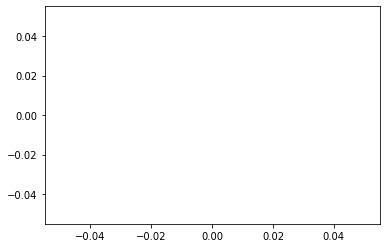

In [ ]:
import matplotlib.pyplot as plt

plt.plot()

In [ ]:
from collections import defaultdict, Counter

lookup = defaultdict(int)
my_counter = Counter()

In [ ]:

match = 10
print(match)

from re import *      # import the entire contents of a module
print(match)          # overwrite variables 

10
<function match at 0x7f6c84f00ca0>


## **Functions**

**A function is a rule** for taking zero or more inputs and returning a corresponding output. In Python, we typically define funcitons using def:

In [ ]:
def double(x):
  """
  This is where you put an optional docstring that explains what the 
  function does. For example, this function multiplies its input by 2.
  """
  return x * 2



def apply_to_one(f):
  """Calls the function f with 1 as its argument"""
  return f(1)


my_double = double                   # refers to the previously defined function
x = apply_to_one(my_double)          # apply_to_one(double): f(1) = x*2 :  

print(x)

2


## **Lambda**

Short anonymous functions

In [ ]:
y = apply_to_one(lambda x: x + 4)     # f(1) = x + 4 

print(y)

5


In [ ]:
another_double = lambda x: 2 * x      # don't do this

def another_double(x):
  """Do this instead"""
  return 2 * x

In [ ]:
# fucntion parameters can also be given default arguments

def my_print(message = "my default message"):
  print(message)


my_print("hello")
my_print()

hello
my default message


In [ ]:
def full_name(first = "What's-his-name", last = "Something"):
  return first + " " + last

print(full_name("Joel", "Grus"))
print(full_name("Joel"))
print(full_name(last="Grus"))

Joel Grus
Joel Something
What's-his-name Grus


## **Strings**

Strings can be delimited by single or double quotation marks (but the **quotes have to match**)

In [ ]:
single_quoted_string = 'data science'  # single quotation marks
double_quoted_string = "data science"  # double quotation marks


if single_quoted_string == double_quoted_string:
  print("same")

same


In [ ]:
tab_string = "\t"   # represents the tab character 
len(tab_string)     # is 1

1

In [ ]:
not_tab_string = r"\t"  # represents the characters '\' and 't'
len(not_tab_string)

2

In [ ]:
multi_line_string = """This is the first line.
and this is the second line
and this is the third line"""

print(multi_line_string)                    

This is the first line.
and this is the second line
and this is the third line


In [ ]:
first_name = "Joel"
last_name = "Grus"

full_name1 = first_name + " " + last_name             # string addition
full_name2 = "{0} {1}".format(first_name, last_name)  # string.format 
full_name3 = f"{first_name} {last_name}"

print(full_name1)
print(full_name2)
print(full_name3)

Joel Grus
Joel Grus
Joel Grus


## **Exceptions**

When something goes wrong, Python raises an exception. Unhadled, exceptions will cause your program to crash.

In [ ]:
try:
  print(0/0)
except ZeroDivisionError:
  print("cannot divide by zero")

cannot divide by zero


## **Lists**

The list is simply an ordered collection and the most fundamental data structure in Python.

In [ ]:
integer_list = [1, 2, 3]
heterogeneous_list = ['string', 0.1, True]
lsit_of_list = [integer_list, heterogeneous_list, []]

list_length = len(integer_list)
list_sum = sum(integer_list)

print(list_length)
print(list_sum)

3
6


In [ ]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
zero = x[0]

print(zero)

0


In [ ]:
one = x[1]
nine = x[-1]        # Pythonic for last element
eight = x[-2]       # Pythonic for the next-to-last element 
x[0] = -1           # reassign the first element to -1



print(one)
print(nine)
print(eight)
print(x[0])

1
9
8
-1


In [ ]:
# use square brackets to slice lists.
# The slice i: j means all elements from i (inclusive) to j(not inclusive)

first_three = x[:3]
three_to_end = x[3:]
one_to_four = x[1:5]
last_three = x[-3:]
without_first_and_last = x[1:-1]
copy_of_x = x[:]

print(first_three)
print(three_to_end)
print(one_to_four)
print(last_three)
print(without_first_and_last)
print(copy_of_x)

[-1, 1, 2]
[3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4]
[7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8]
[-1, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
every_third = x[::3]
five_to_three = x[5:2:-1]

print(every_third)
print(five_to_three)

[-1, 3, 6, 9]
[5, 4, 3]


In [ ]:
1 in [1, 2, 3]

True

In [ ]:
0 in [1, 2, 3]

False

In [ ]:
x = [1, 2, 3]
x.extend([4, 5, 6])   # extend to add items for another collection

print(x)

[1, 2, 3, 4, 5, 6]


In [ ]:
x = [1, 2, 3]
y = x + [4, 5, 6]     
y

[1, 2, 3, 4, 5, 6]

In [ ]:
x = [1, 2, 3]
x.append(0)
y = x[-1]
z = len(x)

print(x)
print(y)
print(z)

[1, 2, 3, 0]
0
4


In [ ]:
x, y = [1, 2]

print(x, type(x))
print(y, type(y))


1 <class 'int'>
2 <class 'int'>


In [ ]:
_, y = [1, 2]    # use an nderscore ofr a value you're goint to throw away

print(y)

2


## **Tuples**

Tuples are lists' **immutable cousins**. Pretty much anything you can do to a list that **doesn't involve modifying it**.

In [ ]:
my_list = [1, 2]
my_tuple = (1, 2)
other_tuple = 3, 4


print(my_list, type(my_list))
print(my_tuple, type(my_tuple))
print(other_tuple, type(other_tuple))

[1, 2] <class 'list'>
(1, 2) <class 'tuple'>
(3, 4) <class 'tuple'>


In [ ]:
my_list[1] = 3

print(my_list)

[1, 3]


In [ ]:
try: 
  my_tuple[1] = 3
except TypeError:
  print("cannot modify a tuple")

cannot modify a tuple


In [ ]:
def sum_and_product(x, y):
  return (x + y), (x * y)


sp = sum_and_product(2, 3)
s, p = sum_and_product(5, 10)

print(sp, type(sp))
print(s, type(s))
print(p, type(p))

(5, 6) <class 'tuple'>
15 <class 'int'>
50 <class 'int'>


In [ ]:
x, y = 1, 2
print(f"x = {x}, y = {y}")

# Pythonic way to swap variables:
x, y = y, x       
print(f"x = {x}, y = {y}")

x = 1, y = 2
x = 2, y = 1


## **Dictionaries**

a dictionary associates **values with keys** and allows you to quickly retrieve the value corresponding to a given key:

In [ ]:
empty_dict = {}                        # Pythonic        make empy dict
empty_dict2 = dict()                   # less Pythonic   make empty dict  
grades = {"Joel": 80, "Tim": 95}       

joels_grade = grades["Joel"]
print(joels_grade)

80


In [ ]:
try:
  kates_grade = grades["Kate"]
except KeyError:
  print("no grade for Kate!")

no grade for Kate!


In [ ]:
joel_has_grade = "Joel" in grades
kate_has_grade = "Kate" in grades

print(joel_has_grade)
print(kate_has_grade)

True
False


In [ ]:
# get method that returns a defualt value

joels_grade = grades.get("Joel", 0)   # if there are key in dict then give value 
kates_grade = grades.get("Kate", 0)   # else give define parameter
no_ones_grade = grades.get("No One")  # default is None

print(joels_grade)
print(kates_grade)
print(no_ones_grade)

80
0
None


In [ ]:
# assign key value pair

grades["Tim"]  = 99                # replaces the old value
grades["Kate"] = 100               # adds a third entry

num_students = len(grades)

print(num_students)

3


In [ ]:
tweet = {
          "user" : "joelgrus",
          "text" : "Data Science is Awesome",
          "retweet_count" : 100,
          "hashtags" : ["#data", "#science", "#datascience", "#awesome", "#yolo"]
}

print(tweet, type(tweet))

{'user': 'joelgrus', 'text': 'Data Science is Awesome', 'retweet_count': 100, 'hashtags': ['#data', '#science', '#datascience', '#awesome', '#yolo']} <class 'dict'>


In [ ]:
tweet_keys = tweet.keys()        # iterable for the keys
tweet_values = tweet.values()    # iterable for the values
tweet_items = tweet.items()      # iterable for the (key, value) tuples

print(tweet_keys)
print(tweet_values)
print(tweet_items)

dict_keys(['user', 'text', 'retweet_count', 'hashtags'])
dict_values(['joelgrus', 'Data Science is Awesome', 100, ['#data', '#science', '#datascience', '#awesome', '#yolo']])
dict_items([('user', 'joelgrus'), ('text', 'Data Science is Awesome'), ('retweet_count', 100), ('hashtags', ['#data', '#science', '#datascience', '#awesome', '#yolo'])])


In [ ]:
"user" in  tweet_keys      # not Pythonic 

True

In [ ]:
"user" in tweet            # Pythonic way of checking for keys

True

In [ ]:
"joelgrus" in tweet_values # 

True

## **defaultdict**

A defaultdict is like a regular dictionary, **except that when you try to look up a key it doen't contain**, it first adds a value for it using a zero-argument function you provided when you created it

In [ ]:
old_document = """O brawling love, O loving hate, 
O any thing of nothing first create! 
O heavy lightness, serious vanity,
Misshapen chaos of well-seeming forms,
Feather of lead, bright smoke, cold fire, sick health,
Still-waking sleep, that is not what it is!"""

In [ ]:
document = old_document.split(" ")
document = [w.replace('!', '') for w in document]
document = [w.replace(',', '') for w in document]
document = [w.replace('\n', '') for w in document]
document = [w.lower() for w in document]

In [ ]:
word_counts = {}
for word in document:
  if word in word_counts:
    word_counts[word] += 1
  else: 
    word_counts[word] = 1

print(word_counts)

{'o': 4, 'brawling': 1, 'love': 1, 'loving': 1, 'hate': 1, 'any': 1, 'thing': 1, 'of': 3, 'nothing': 1, 'first': 1, 'create': 1, 'heavy': 1, 'lightness': 1, 'serious': 1, 'vanitymisshapen': 1, 'chaos': 1, 'well-seeming': 1, 'formsfeather': 1, 'lead': 1, 'bright': 1, 'smoke': 1, 'cold': 1, 'fire': 1, 'sick': 1, 'healthstill-waking': 1, 'sleep': 1, 'that': 1, 'is': 2, 'not': 1, 'what': 1, 'it': 1}


In [ ]:
word_counts = {}
for word in document:
  try:
    word_counts[word] += 1
  except KeyError:
    word_counts[word] = 1

print(word_counts)

{'o': 4, 'brawling': 1, 'love': 1, 'loving': 1, 'hate': 1, 'any': 1, 'thing': 1, 'of': 3, 'nothing': 1, 'first': 1, 'create': 1, 'heavy': 1, 'lightness': 1, 'serious': 1, 'vanitymisshapen': 1, 'chaos': 1, 'well-seeming': 1, 'formsfeather': 1, 'lead': 1, 'bright': 1, 'smoke': 1, 'cold': 1, 'fire': 1, 'sick': 1, 'healthstill-waking': 1, 'sleep': 1, 'that': 1, 'is': 2, 'not': 1, 'what': 1, 'it': 1}


In [ ]:
word_counts = {}
for word in document:
  previous_count = word_counts.get(word, 0)
  word_counts[word] = previous_count + 1

print(word_counts)

{'o': 4, 'brawling': 1, 'love': 1, 'loving': 1, 'hate': 1, 'any': 1, 'thing': 1, 'of': 3, 'nothing': 1, 'first': 1, 'create': 1, 'heavy': 1, 'lightness': 1, 'serious': 1, 'vanitymisshapen': 1, 'chaos': 1, 'well-seeming': 1, 'formsfeather': 1, 'lead': 1, 'bright': 1, 'smoke': 1, 'cold': 1, 'fire': 1, 'sick': 1, 'healthstill-waking': 1, 'sleep': 1, 'that': 1, 'is': 2, 'not': 1, 'what': 1, 'it': 1}


In [ ]:
from collections import defaultdict

word_counts = defaultdict(int)
for word in document:
  word_counts[word] +=1


print(word_counts)

defaultdict(<class 'int'>, {'o': 4, 'brawling': 1, 'love': 1, 'loving': 1, 'hate': 1, 'any': 1, 'thing': 1, 'of': 3, 'nothing': 1, 'first': 1, 'create': 1, 'heavy': 1, 'lightness': 1, 'serious': 1, 'vanitymisshapen': 1, 'chaos': 1, 'well-seeming': 1, 'formsfeather': 1, 'lead': 1, 'bright': 1, 'smoke': 1, 'cold': 1, 'fire': 1, 'sick': 1, 'healthstill-waking': 1, 'sleep': 1, 'that': 1, 'is': 2, 'not': 1, 'what': 1, 'it': 1})


In [ ]:
dd_list = defaultdict(list)
dd_list[2].append(1)

print(dd_list)

defaultdict(<class 'list'>, {2: [1]})


In [ ]:
dd_dict = defaultdict(dict)
dd_dict["Joel"]["City"] = "Seattle"

print(dd_dict)

defaultdict(<class 'dict'>, {'Joel': {'City': 'Seattle'}})


In [ ]:
dd_pair = defaultdict(lambda: [0, 0])
dd_pair[2][1] = 1

print(dd_pair)

defaultdict(<function <lambda> at 0x7f6c6cbc2e50>, {2: [0, 1]})


## **Counters**

A counter turns a sequence of values into a defaultdict(int)-like object **mapping keys to counts**

In [ ]:
from collections import Counter

c = Counter([0, 1, 2, 0])
print(c)

Counter({0: 2, 1: 1, 2: 1})


In [ ]:
word_counts = Counter(document)

print(word_counts)

Counter({'o': 4, 'of': 3, 'is': 2, 'brawling': 1, 'love': 1, 'loving': 1, 'hate': 1, 'any': 1, 'thing': 1, 'nothing': 1, 'first': 1, 'create': 1, 'heavy': 1, 'lightness': 1, 'serious': 1, 'vanitymisshapen': 1, 'chaos': 1, 'well-seeming': 1, 'formsfeather': 1, 'lead': 1, 'bright': 1, 'smoke': 1, 'cold': 1, 'fire': 1, 'sick': 1, 'healthstill-waking': 1, 'sleep': 1, 'that': 1, 'not': 1, 'what': 1, 'it': 1})


In [ ]:
for word, count in word_counts.most_common(10):
  print(word, count)

o 4
of 3
is 2
brawling 1
love 1
loving 1
hate 1
any 1
thing 1
nothing 1


## **Sets**

Set is a collection of distinct elements

We' ll use sets fro two main reasons. 
* The first is that `in` **is a very fast** operation on sets.
* The second reason is to find the **distinct items** in a collection

In [ ]:
primes_below_10 = {2, 3, 5, 7}

In [ ]:
s = set()                # make empty set

s.add(1)
s.add(2)
s.add(2)
x = len(s)
y = 2 in s
z = 3 in s

print(x)
print(y)
print(z)

2
True
False


`in` **is a very fast** operation on sets

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
hundreads_of_other_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stopwords_list = ["a", "an", "at"] + hundreads_of_other_words + ["yet", "you"]

In [ ]:
import timeit

In [ ]:
start = timeit.default_timer()

print("zip" in stopwords_list)

stop = timeit.default_timer()

print('Time: ', stop - start)

False
Time:  0.0031141949999948793


In [ ]:
stopwords_set = set(stopwords_list)

In [ ]:
start = timeit.default_timer()

print("zip" in stopwords_set)

stop = timeit.default_timer()

print('Time: ', stop - start)

False
Time:  0.0022341140000037285


find the **distinct items** in a collection

In [ ]:
item_list = [1, 2, 3, 1, 2, 3]
num_items = len(item_list)

item_set = set(item_list)
num_distinct_items = len(item_set)
distinct_item_list = list(item_set)

print(num_items)
print(num_distinct_items)
print(distinct_item_list)

6
3
[1, 2, 3]


## **Control Flow**

In [ ]:
if 1 > 2:
  message = "if only 1 were grater than two..."
elif 1 > 3:
  message = "elif stands for 'else if'"
else:
  message = "when all else fails use else (if you want to)"

print(message)

when all else fails use else (if you want to)


In [ ]:
# ternary if-then-else on one line
x = 5
parity = "even" if x % 2 == 0 else "odd"

print(parity)

odd


In [ ]:
x = 0
while x < 10:
  print(f"{x} is less than 10")
  x += 1

0 is less than 10
1 is less than 10
2 is less than 10
3 is less than 10
4 is less than 10
5 is less than 10
6 is less than 10
7 is less than 10
8 is less than 10
9 is less than 10


In [ ]:
# range(10) is the number 0, 1, ..., 9
for x in range(10):
  print(f"{x} is less than 10")

0 is less than 10
1 is less than 10
2 is less than 10
3 is less than 10
4 is less than 10
5 is less than 10
6 is less than 10
7 is less than 10
8 is less than 10
9 is less than 10


In [ ]:
for x in range(10):
  if x == 3:
    continue                  # go immediately to the next iteration
  if x == 5:
    break
  print(x)

0
1
2
4


## **Truthiness**

**Booleans** in Python work as in most other languages, except that they'**re captitalized**

In [ ]:
falsy = [
        False,
        None,          
        [],                # an empty list
        {},                # an empty dict
        "",                # an empty string
        set()              # an empty set
        0,                 # zero int
        0.0                # zero float
]

In [ ]:
one_is_less_than_two = 1 < 2
true_equals_false = True == False

print(one_is_less_than_two)
print(true_equals_false)

True
False


In [ ]:
x = None
assert x == None, "this is the not the Pythonic way to chek for None"
assert x is None, "this is the Pythonic way to check for None"

In [ ]:
s = 'cat'
if s:
  first_char = s[0]
else:
  first_char = ""

print(first_char)

c


In [ ]:
first_char = s and s[0]

print(first_char)

c


In [ ]:
x = True #@param ["False", "True"] {type:"raw"}

safe_x = x or 0

print(safe_x)

True


In [ ]:
ex0 = all([True, 1, {3}])         # True, all are truthy
ex1 = all([True, 1, {}])          # False, {} is falsy
ex2 = any([True, 1, {}])          # True, True is truthy
ex3 = all([])                     # True, no false element in the list
ex4 = any([])                     # False, non trusty element in the list   




print(ex0, ex1, ex2, ex3, ex4)

True False True True False


## **Sorting**

In [ ]:
x = [4, 1, 2, 3]
y = sorted(x) 

print(y)
print(x)   

x.sort()
print(x)

[1, 2, 3, 4]
[4, 1, 2, 3]
[1, 2, 3, 4]


In [ ]:
# sort the list by absolute value from largest to smallest
x = sorted([-4, 1, -2, 3], key=abs, reverse=True)

print(x)

[-4, 3, -2, 1]


In [ ]:
# sort the words and counts from highest count to lowest
wc = sorted(word_counts.items(),
            key=lambda word_and_count: word_and_count[1],
            reverse=True)

wc

[('o', 4),
 ('of', 3),
 ('is', 2),
 ('brawling', 1),
 ('love', 1),
 ('loving', 1),
 ('hate', 1),
 ('any', 1),
 ('thing', 1),
 ('nothing', 1),
 ('first', 1),
 ('create', 1),
 ('heavy', 1),
 ('lightness', 1),
 ('serious', 1),
 ('vanitymisshapen', 1),
 ('chaos', 1),
 ('well-seeming', 1),
 ('formsfeather', 1),
 ('lead', 1),
 ('bright', 1),
 ('smoke', 1),
 ('cold', 1),
 ('fire', 1),
 ('sick', 1),
 ('healthstill-waking', 1),
 ('sleep', 1),
 ('that', 1),
 ('not', 1),
 ('what', 1),
 ('it', 1)]

## **List Comprehensions**

Transform a list into another list by choosing only certain elements, by transforming elements, or both.

In [ ]:
even_numbers = [x for x in range(5) if x % 2 == 0]
squares = [x * x for x in range(5)]
even_squares = [x * x for x in even_numbers]

print(even_numbers)
print(squares)
print(even_squares)

[0, 2, 4]
[0, 1, 4, 9, 16]
[0, 4, 16]


In [ ]:
square_dict = {x: x * x for x in range(5)}
square_set = {x * x for x in [1, 2, 3, 4, 5]}

print(square_dict)
print(square_set)

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16}
{1, 4, 9, 16, 25}


In [ ]:
zeroes = [0 for _ in even_numbers]

print(zeroes)

[0, 0, 0]


In [ ]:
pair = [(x, y)
        for x in range(3)
        for y in range(3)]

print(pair)

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]


In [ ]:
increasing_pairs = [(x, y)
                    for x in range(3)
                    for y in range(x + 1, 10, 2)]

print(increasing_pairs)

[(0, 1), (0, 3), (0, 5), (0, 7), (0, 9), (1, 2), (1, 4), (1, 6), (1, 8), (2, 3), (2, 5), (2, 7), (2, 9)]


## **Automated Testing and assert**

In [ ]:
assert 1 + 1 == 2
assert 1 + 1 == 2, "1 + 1 should equal 2 but didnt't"

In [ ]:
# more common using assert in this way

def smallest_item(xs):
  return min(xs)

assert smallest_item([10, 20, 5, 40]) == 5
assert smallest_item([1, 0, -1, 2]) == -1

In [ ]:
# less common using assert to check inputs in functions

def smallest_item(xs):
  assert xs, "empty list has no smallest item"
  return min(xs)

## **Object-Oriented Programming**

Python allows you to define classes that encapsulate data and the functions that operate on them.

In [ ]:
class CountingClicker:
  """A class can/should have a docstring, 
  just like a function
  """
  def __init__(self, count = 0):   # __init__ take parameters to construct an instance of class
    self.count = count

  def __repr__(self):              # __repr__ produce the string representation of a class instance
    return f"CountingClicker(count={self.count})"
  
  def click(self, num_times = 1):
    """Click the clicker some number of times."""
    self.count += num_times
  
  def read(self):
    return self.count

  def reset(self):
    self.count = 0


# A subclass inherits all the behavior of its parent class.
class NoResetClicker(CountingClicker):
  # This class has all the same methods as CountingClicker
  # Except that it has a reset method that does nothing.
  def reset(self):
    pass

In [ ]:
# use assert to write some test cases for our clicker
clicker = CountingClicker()
assert clicker.read() == 0, "clicker should start with count 0"
clicker.click()
clicker.click()
assert clicker.read() == 2, "after two clicks, clicker should have count 2"
clicker.reset()
assert clicker.read() == 0, "after reset, clicker should be back to 0"

print(clicker)

CountingClicker(count=0)


In [ ]:
# construct instances of the clicker by using CountingClicker class name

clicker1 = CountingClicker()
clicker2 = CountingClicker(100)
clicker3 = CountingClicker(count=100)

print(clicker1)
print(clicker2)
print(clicker3)

CountingClicker(count=0)
CountingClicker(count=100)
CountingClicker(count=100)


In [ ]:
# construct instances of the clicker by using NoResetClicker class name

clicker2 = NoResetClicker()
assert clicker2.read() == 0

print(clicker2)

clicker2.click()
assert clicker2.read() == 1

print(clicker2)

clicker2.reset()             # reset function pass    
assert clicker2.read() == 1, "reset shouldn't do anything"

print(clicker2)

CountingClicker(count=0)
CountingClicker(count=1)
CountingClicker(count=1)


## **Iterables and Generators**

We can create generators, by using `for` and `in`, which can be **iterated over** just like list but generate their values **on demand**

In [ ]:
def generate_range(n):
  i = 0
  while i < n:
    yield i                   # every call to yield produces a value of the generator
    i += 1  

for i in generate_range(10):  # call function generate_range
  print(f"i : {i}")

i : 0
i : 1
i : 2
i : 3
i : 4
i : 5
i : 6
i : 7
i : 8
i : 9


In [ ]:
def natural_numbers():
  """returns 1, 2, 3, ..."""
  n = 1
  while True:
    yield n       # yield statement returns a generator object to the *one* who calls the function which contains yield
    n += 1
    if n == 100:
      break


In [ ]:
evens_below_20 = (i for i in generate_range(20) if i % 2 == 0)
list(evens_below_20)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [ ]:
# None of these computations *does* anything until we iterate
data = natural_numbers()
evens = (x for x in data if x % 2 == 0)    # x which is in data and x can divide by 2
even_squares = (x**2 for x in evens)       # x square, x which is in even 
even_squares_ending_in_six = (x for x in even_squares if x % 10 == 6)  # x which is in even_squares and a reminder is 6

print(data)                                  # only this get yielded 
print(evens)                                 # empty
print(even_squares)                          # empty
print(even_squares_ending_in_six)            # empty

<generator object natural_numbers at 0x7fd608114ac0>
<generator object <genexpr> at 0x7fd6081143c0>
<generator object <genexpr> at 0x7fd608114430>
<generator object <genexpr> at 0x7fd608114c10>


In [ ]:
names = ["Alice", "Bob", "Charlie", "Debbie"]

In [ ]:
# not Pythonic
for i in range(len(names)):
  print(f"name {i} is {names[i]}")

name 0 is Alice
name 1 is Bob
name 2 is Charlie
name 3 is Debbie


In [ ]:
# also not Pythonic
i = 0
for name in names:
  print(f"name {i} is {names[i]}")
  i += 1

name 0 is Alice
name 1 is Bob
name 2 is Charlie
name 3 is Debbie


In [ ]:
# Pythonic                 
for i, name in enumerate(names):     # use enumerate: give an index and also return a value
  print(f"name {i} is {name}")

name 0 is Alice
name 1 is Bob
name 2 is Charlie
name 3 is Debbie


## **Randomness**

In [ ]:
import random

random.seed(10) # this ensures we get the dame results every time

# random.random() produces numbers uniformly betweeen 0 and 1
# it's the random function we'll use most often
four_uniform_randoms = [random.random() for _ in range(4)] # give a list that contain 4 random numbers 
four_uniform_randoms

[0.5714025946899135,
 0.4288890546751146,
 0.5780913011344704,
 0.20609823213950174]

In [ ]:
# random module actually produces **pseudo-random**
random.seed(10)                 # set the seed to 10
print(random.random())          
random.seed(10)                 # reset the seed to 10
print(random.random())

0.5714025946899135
0.5714025946899135


In [ ]:
# returns an element chosen randomly from the corresponding range
rr1 = random.randrange(10)
rr2 = random.randrange(13, 16)

print(rr1)
print(rr2)

3
14


In [ ]:
# randomly reorders the elements of a list
up_to_ten = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
random.shuffle(up_to_ten)
print(up_to_ten)

[2, 6, 7, 10, 4, 9, 1, 3, 5, 8]


In [ ]:
# randomly pick one element from a list
my_best_friend = random.choice(["Alice", "Bob", "Charlie"])
my_best_friend

'Bob'

In [ ]:
# randomly choose a sample of elements without replacement (i.e., with no duplicates)
lottery_numbers = range(10)
winning_numbers = random.sample(lottery_numbers, 9)
winning_numbers

[6, 4, 8, 3, 1, 2, 7, 0, 5]

In [ ]:
# choose a sample of elements with replacement (i.e., allowing duplicates)
four_with_replacement = [random.choice(range(10)) for _ in range(4)]
four_with_replacement

[3, 7, 9, 6]

## **Regular Expressions**

Regular expressions provide a way of searching text.

In [ ]:
import re

# re.match  : beginning of a string matches a regular expression
# re.search : any part of a string matches a regular expression

# list of boolean give all True
re_examples = [                             # All of these are True, because
    not re.match("a", "cat"),                   # 'cat' doesn't start with 'a'          
    re.search("a", "cat"),                      # 'cat' has an 'a' in it
    not re.search("c", "dog"),                  # 'dog' doesn't have a 'c' in it. 
    3 == len(re.split("[ab]", "carbs")),        # Split on a or b to ['c', 'r', 's']
    "R-D-" == re.sub("[0-9]", "-", "R2D2")      # Replace digits with dashes.  
]
assert all(re_examples), "all the regex examples should be True"

## **zip and Argument Unpacking**

In [ ]:
# zip two or more iterable together into a single iterable of tuples

list1 = ['a', 'b', 'c']
list2 = [1, 2, 3]

# zip is lazy, so you have to do something like the following
z = [pair for pair in zip(list1, list2)]
z

[('a', 1), ('b', 2), ('c', 3)]

In [ ]:
# unzip

pairs = [('a', 1), ('b', 2), ('c', 3)]  
letters, numbers = zip(*pairs)        # * performs argument unpacking

print(letters)
print(numbers)

('a', 'b', 'c')
(1, 2, 3)


In [ ]:
letters, numbers = zip(('a', 1), ('b', 2), ('c', 3))

print(letters)
print(numbers)

('a', 'b', 'c')
(1, 2, 3)


In [ ]:
def add(a, b): return a + b

add(1, 2)                        # returns 3
try:
  add([1, 2])
except TypeError:
  print("add expects two inputs")

add(*[1, 2])                      # returns 3

add expects two inputs


3

## **args and kwargs**

In [ ]:
def doubler(f):
  # Here we define a new function that keeps a reference to f
  def g(x):
    return 2 * f(x)

  # And return the new fuction
  return g  


def f1(x):
  return x + 1


g = doubler(f1)          # function that takes as input some function 
assert g(3) == 8,  "(3 + 1) * 2 should equal 8"
assert g(-1) == 0, "(-1 + 1) * 2 should equal 0" 

In [ ]:
# doens't work with functions that take more than a single argument

def f2(x, y):
  return x + y

g = doubler(f2)
try:
  g(1, 2)
except TypeError:
  print("as defined, g only takes one argument") 

as defined, g only takes one argument


In [ ]:
def magic(*args, **kwargs):
  print("unnamed args:", args)    # args is a tuple of its unnamed arguments
  print("keyword args:", kwargs)  # kwargs is a dict of its named arguments 


magic(1, 2, key="word", key2="word2")

unnamed args: (1, 2)
keyword args: {'key': 'word', 'key2': 'word2'}


In [ ]:
def other_way_magic(x, y, z):
  return x + y + z

x_y_list = [1 , 2]
z_dict = {"z": 3}
assert other_way_magic(*x_y_list, **z_dict) == 6, "1 + 2 + 3 should be 6"

In [ ]:
def doubler_correct(f):
  """works no matter what kind of inputs f expects"""
  def g(*args, **kwargs):
    """whatever arguments g is supplied, pass them through to f"""
    return 2 * f(*args, **kwargs)
  return g

g = doubler_correct(f2)
assert g(1, 2) == 6, "doubler should work now"

12


## **Type Annotations**

Python is a dynamicallly typed language. That menas that it in general it **doesn't care about the types of objects** we use

In [ ]:
def add(a, b):
  return a + b


assert add(10, 5) == 15,                        "+ is valid for number"
assert add([1, 2], [3]) == [1, 2, 3],           "+ is valid for list"
assert add("hi ", "there") == "hi there",       "+ is valid for string"   

In [ ]:
try:
  add(10, "five")
except TypeError:
  print("cannot add an int to a string")

cannot add an int to a string


In [ ]:
def add(a: int, b: int) -> int:   # type annotations but it doesn't do anyting
  return a + b                    # tell that we want int of a,b and function returns int 


add(10, 5)                       # you'd like this to be OK
add("hi ", "there")              # you'd like this to be not OK

'hi there'

In [ ]:
def dot_product(x, y):
  pass
 
Vector = '[[],[]]' 

# we have not yet defined Vector, but imagine we had
def dot_product(x: Vector, y: Vector):
  pass

In [ ]:
from typing import Union

def secretly_ugly_function(value, operation):
  pass

def uglyfunction(value: int,
                 operation: Union[str, int, float, bool]) -> int:
  pass

## **How to Write Type Annotations**

In [ ]:
# This isn't wrong, but the type is not specific enough. 
# It's clear we really want xs to be alist of floats, 
# not (say) a list of string.

def total(xs: list) -> float:     
  return sum(total)

In [ ]:
from typing import List   # note capital L

def total(xs: List[float]) -> float:
  return sum(total)

# this is how to type-annotate variable when you define them
# BUT this is unnecessary; it's "obvious" x is an int.
x: int = 5

In [ ]:
values = []              #  not obvious; what's my type?
est_so_far = None        #  not obvious; what's my type?

In [ ]:
# Use this to give type hints
from typing import Optional

values: List[int] = []
best_so_far : Optional[float] = None  # allowed to be either a float or None

In [ ]:
# the type annotations in this snippet are all unnecessary
from typing import Dict, Iterable, Tuple

# keys are strings, values are ints
Counts: Dict[str, int] = {'data': 1, 'science': 2}

lazy = False

# lists and generators are both iterable
if lazy:
  evens: Iterable[int] = (x for x in range(10) if x % 2 == 0)
else:
  evens = [0, 2, 4, 6, 8]

# tuples specify a type for each element
triple: Tuple[int, float, int] = (10, 2.3, 5)

In [ ]:
from typing import Callable

# The type hint says that repeater is a funciton that takes
# two arguments, a string and an int, and returns a string.
def twice(repeater: Callable[[str, int], str], s: str) -> str:
  return repeater(s, 2)


def comma_repeater(s: str, n: int) -> str:
  n_copies = [s for _ in range(n)]
  return ', '.join(n_copies)

assert twice(comma_repeater, "type hints") == "type hints, type hints"

In [ ]:
Number = int
Numbers = List[Number]

def total(xs: Numbers) -> Number:
  return sum(xs)

# <center><b>Chapter 3. Visualizing Data</b></center>

A **fundamental part** of the data scientist's toolkit is **data visualization**. Althought it is very easy to create visualizations, it's much harder to produce good ones. 

There are two primary uses for data visualization:

* To **explore** data
* To **communicate** data

A wide variey of **tools** exist for **visualizing data**.

`matplotlib.pyplot` module. 

## **Graph**

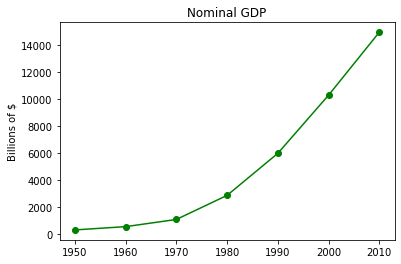

In [ ]:
import matplotlib.pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# add a title
plt.title("Nominal GDP")

# add a lable to the y-axis
plt.ylabel("Billions of $")
plt.show()

## **Bar Charts**

A bar chart is a good choice when you want to show how some **quantity** varies among some **discrete set of items**.

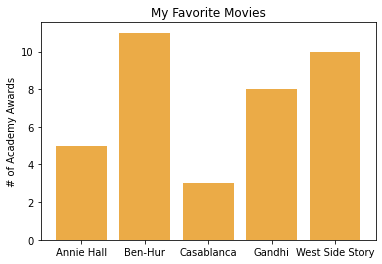

In [ ]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# plot bars with left x-coordinates [0, 1, 2, 3, 4], heights [num_oscars]
plt.bar(range(len(movies)), num_oscars, color="#EBAB47")  # Oscar Gold

plt.title("My Favorite Movies")   # add a title
plt.ylabel("# of Academy Awards") # label the y-axis

# label x-axis with movie names at bar centers
plt.xticks(range(len(movies)), movies)

plt.show()

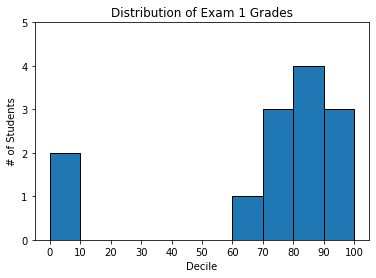

In [ ]:
from collections import Counter

grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

# Bucket grades by decile, but put 100 in with the 90s
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)

plt.bar([x + 5 for x in histogram.keys()],  # Shift bars right by 5
        histogram.values(),                 # Give each bar its correct height
        10,                                 # Give each bar a width of 10
        edgecolor=(0, 0, 0))                # Black edges for each bar

plt.axis([-5, 105, 0, 5])                   # x-axis from -5 to 105,
                                            # y-axis from 0 to 5

plt.xticks([10 * i for i in range(11)])     # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

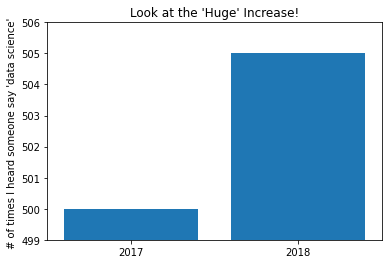

In [ ]:
# Especially BAD form 
# When "y-axis" not to start at 0, 
# it is easy to Mislead people

mentions =[500, 505]
years = [2017, 2018]

plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science' ")

# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)

# misleading y-axis only shows the part above 500
plt.axis([2016.5, 2018.5, 499, 506])         # y-axis range from 499 to 506
plt.title("Look at the 'Huge' Increase!")
plt.show()

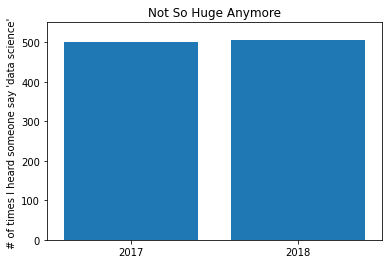

In [ ]:
# more sensible axes

mentions =[500, 505]
years = [2017, 2018]

plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science' ")

# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)

# misleading y-axis only shows the part above 500
plt.axis([2016.5, 2018.5, 0, 550])         # y-axis range from 0 to 550
plt.title("Not So Huge Anymore")
plt.show()

## **Line Charts**

lines chart is used to show changing **trends**

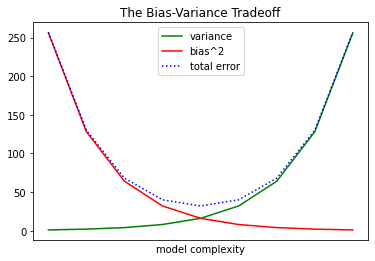

In [ ]:
variance     = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]


# We can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance,     'g',  label='variance')    # green solid line
plt.plot(xs, bias_squared, 'r',  label='bias^2')      # red dot-dashed line
plt.plot(xs, total_error,  'b:', label='total error') # blue dotted line

# Because we've assigned labels to each series,
# We can get a legend for free (loc=9 mens "top center")
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")
plt.show()

## **Scatterplots**

A scatterplot is the right choice for visualizing **the relationship between two paired sets of data**

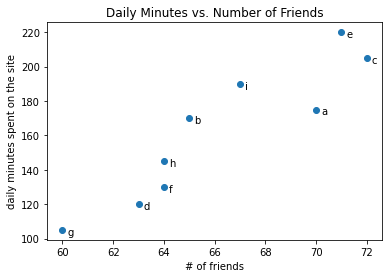

In [ ]:
# the relationship between the number of friends your users have 
# and the number of minute they spend on the site every day

friends = [70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)                                           # plot each dot

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes): # put each in to zip
  plt.annotate(label,                                                   # plot each label one by one
      xy=(friend_count, minute_count),                                  # Put the label with its point
      xytext=(5, -5),                                                   # but slightly offset                     
      textcoords='offset points')
  
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

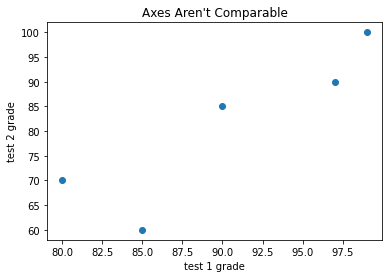

In [ ]:
# you might get a misleading picture
# if you let matplotlib choose the scale

test_1_grades = [99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

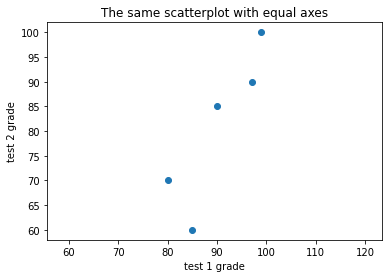

In [ ]:
# plt.axis("equl")
# to make the proportion x and y  equal
# the plot looks more accurate

test_1_grades = [99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("The same scatterplot with equal axes")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.axis("equal")
plt.show()

# <center><b>Chapter 4. Linear Algebra</b></center>

**Linear algebra** is the branch of mathematics that deals with **vector spaces**.

## **Vectors**

**Vectors** are **objects that can be added together** to form **new vectors** and that can be **multipled by scalars** (i.e., numbers), also to form **new vectors**.

Vectors are points in some **finite-dimensional** space.

**Ex.** 

* heights, weights, and ages of a large number of people
  * Treat data as three-dimensional vectors [height, weight, age]
* teaching a class with four exams
  * Treat student grades as four-dimensional vectors [exam1, exam2, exam3, exam4]


Using **lits** as vectors is great for **exposition** but **terrible for performance**.

In [ ]:
from typing import List

Vector = List[float]

# Python lists aren't vectors 

height_weight_age = [70,    # inches,
                     170,   # pounds,
                     40]    # years

grades = [95,   # exam1
          80,   # exam2
          75,   # exam3
          62]   # exam4

In [ ]:
# To begin with We'll frequently need to add two vectos. 
# Vectors add componentwise. If two vectors v and w are the same length
# their sum is just the vector whose first element is v[0] + w[0] (add by order) 
# if they are not the same length, then we're not allowed  to add them.   

def add(v: Vector, w: Vector) -> Vector:
  """Adds corresponding elements"""
  assert len(v) == len(w), "vectors must be the same length"

  return [v_i + w_i for v_i, w_i in zip(v, w)]

assert add([1, 2, 3], [4, 5, 6]) == [5, 7, 9]


def subtract(v: Vector, w: Vector) -> Vector:
  """Subtracts corresponding elements"""
  assert len(v) == len(w), "vectors must be the same length"

  return [v_i + w_i for v_i, w_i in zip(v, w)]   # 1 + (- 1)  plus opposite direction


def vector_sum(vectors: List[Vector]) -> Vector:
  """Sums all corresponding elements"""
  # Check that vectors in not empty
  assert vectors, "no vectors provided!"

  # Check the vectors are all the same size
  num_elements = len(vectors[0])
  assert all(len(v) == num_elements for v in vectors), "different sizes!"

  # the i-th element of the result is the sum of every vector[i]
  return [sum(vector[i] for vector in vectors)
          for i in range(num_elements)]
  
assert vector_sum([[1, 2], [3, 4], [5, 6], [7, 8]]) == [16, 20]  # 16; 1+3+5+7, 20; 2+4+6+8


def scalar_multiply(c: float, v: Vector) -> Vector:
  """Multiplies every element by c"""
  return [c * v_i for v_i in v]

assert scalar_multiply(2, [1, 2, 3]) == [2, 4, 6]


def vector_mean(vectors: List[Vector]) -> Vector:
  """Computes the element-wise average"""
  n = len(vectors)
  return scalar_multiply(1/n, vector_sum(vectors))

assert vector_mean([[1, 2], [3, 4], [5, 6]]) == [3, 4]    # 3; (1+3+5)/3, 4; (2+4+6)/3


def dot(v: Vector, w: Vector) -> float:
  """Computes v_1 * w_1 + ... + v_n * w_n"""
  assert len(v) == len(w), "vectors must be same length"

  return sum(v_i * w_i for v_i, w_i in zip(v, w))

assert dot([1, 2, 3], [4, 5, 6]) == 32                    # 32; 1*4 + 2*5 + 3*6


In [ ]:
def sum_of_squares(v: Vector) -> float:
  """Returns v_1 * v_1 + ... + v_n * v_n"""
  return dot(v, v)

assert sum_of_squares([1, 2, 3]) == 14                    # 14; 1*1 + 2*2 + 3*3

In [ ]:
import math


def magnitude(v: Vector) -> float:
  """Returns the magnitude (or length) of v"""
  return math.sqrt(sum_of_squares(v))    # math.sqrt is square root function

assert magnitude([3, 4]) == 5             # 5; √(3*3 + 4*4)           

In [ ]:
def squared_distance(v: Vector, w: Vector) -> float:
  """Computes (v_1 - w_1)**2 + ... + (v_n - w_n)**2"""
  return sum_of_squares(subtract(v, w))


def distance(v: Vector, w: Vector) -> float:
  """Computes the distance between v and w"""
  return math.sqrt(squared_distance(v, w))


def distance(v: Vector, w: Vector) -> float:
  return magnitude(subtract(v, w))

## **Matrices**

A matrix is a **two-dimensional collection** of numbers. We will represent matrices as **lists of lists**, with each inner list having the same size and represeting a row of the matrix. If A is a matrix, then a[i][j] is the element in the ith row and the jth column. Per mathematical convention, we will frequently use capital letters to represent matrices.


Matrices will be **important to us** for several reasons.
* First, we can use a matrix to **represent a dataset consisting of multiple vectors**, simply by considering each vector as a row of the matrix.
* Second, we can use an **n X k matrix to represent a linear function** that maps k-dimensional vectors to n-dimensional vectors. 
* Third, matrices can be used to **represent binary relationships**.


In [ ]:
# Another type alias
Matrix = List[List[float]]

A = [[1, 2, 3],     # A has 2 rows and 3 columns
     [4, 5, 6]]

B = [[1, 2],        # B has 3 rows and 2 columns
     [3, 4],
     [5, 6]]

In [ ]:
from typing import Tuple


def shape(A: Matrix) -> Tuple[int, int]:
  """Returns (# of rows of A, # of columns of A)"""
  num_rows = len(A)
  num_cols = len(A[0]) if A else 0                        # number of elements in first row
  return num_rows, num_cols

assert shape([[1, 2, 3], [4, 5, 6]]) == (2, 3)            # 2 rows, 3 columns 

In [ ]:
def get_row(A: Matrix, i: int) -> Vector:
  """Returns the i-th row of A (as a Vector)"""
  return A[i]                                             # A[i] is already the ith row


def get_column(A: Matrix, j: int) -> Vector:
  """Returns the j-th column of A (as a Vector)"""
  return [A_i[j]                                          # jth element of row A_i  
          for A_i in A]                                   # for each row A_i

In [ ]:
from typing import Callable


def make_matrix(num_rows: int,
                num_cols: int,
                entry_fn: Callable[[int, int], float]) -> Matrix:
    """
    Return a num_rows x num_cols matrix
    whose (i, j)-th entry is entry_fn(i, j)
    """
    return [[entry_fn(i, j)                               # given i, create a list     
            for j in range(num_cols)]                     # [entry_fn(i, 0),...]
            for i in range(num_rows)]                     # create one list for each i


def identity_matrix(n: int) -> Matrix:
  """Returns the n x n identity matrix"""
  return make_matrix(n, n, lambda i, j: 1 if i == j else 0)

assert identity_matrix(5) == [[1, 0, 0, 0, 0],
                              [0, 1, 0, 0, 0],
                              [0, 0, 1, 0, 0],
                              [0, 0, 0, 1, 0],
                              [0, 0, 0, 0, 1]]

In [ ]:
# Matrices will be important to use for several reasons.

# represent a dataset consisting of multiple vectors, 
# each vector as row of the matrix

data = [[70, 170, 40],           # first  person has  70 kg, spent 170 for foods/week and, 40 for age
        [65, 120, 26],           # second person has  65 kg, spent 120 for foods/week and, 26 for age
        [77, 250, 19],]          # third  person has  77 kg, spent 250 for foods/week and, 19 for age


 # represent binary relationship by matrices

friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]     


# We could also represent relationship as cross matrix:
# it is quicker to check two nodes are connected

#            user 0  1  2  3  4  5  6  7  8  9
friend_matrix = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0],   # user 0
                 [1, 0, 1, 1, 0, 0, 0, 0, 0, 0],   # user 1  
                 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],   # user 2
                 [0, 1, 1, 0, 1, 0, 0, 0, 0, 0],   # user 3
                 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],   # user 4
                 [0, 0, 0, 0, 1, 0, 1, 1, 0, 0],   # user 5
                 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],   # user 6
                 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],   # user 7
                 [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],   # user 8
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]   # user 9


assert friend_matrix[0][2] == 1, "0 and 2 are friends"
assert friend_matrix[0][8] == 0, "0 and 8 are not friends"     
           

In [ ]:
# only need to look at one row
friends_of_five = [i 
                   for i, is_friend in enumerate(friend_matrix[5])
                   if is_friend]

friends_of_five        

[4, 6, 7]

# <center><b>Chapter 5. Statistics</b></center>

**Statistics** refers to **the mathematics** and **teachniques with** which we **understand data**.



## **Discriptive statistic: Describing a Single Set of Data**

In [ ]:
# For a small dataset, Print-out might be the best description

num_friends_small = [100, 49, 41, 40, 25]
num_friends_small

[100, 49, 41, 40, 25]

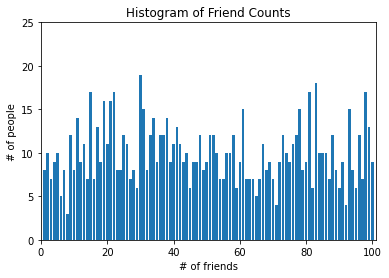

In [ ]:
# For a larget dataset, We use statistics(visualizing) to reveal our data

from collections import Counter
import matplotlib.pyplot as plt
import random

random.seed(24)
num_friends_large = [random.randint(1, 100) for i in range(999)]
num_friends_large.append(200)                     # outlier

friend_counts = Counter(num_friends_large)
xs = range(101)                                   # largest value is 100
ys = [friend_counts[x] for x in xs]               # height is just # of friends

plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")                        # people who have just one friend; x = 1
plt.ylabel("# of people")                         # there are 8 people; y = 8
plt.show()

In [ ]:
# number of data points; show numbers of thigs that we studied
num_points = len(num_friends_large)            
num_points

1000

In [ ]:
largest_value = max(num_friends_large)
smallest_value = min(num_friends_large)

print("largest value : {}".format(largest_value))
print("smallest value : {}".format(smallest_value))

largest value : 100
smallest value : 1


In [ ]:
sorted_values = sorted(num_friends_large)  

smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-1]

print("smallest value : {}".format(smallest_value))
print("second smallest value : {}".format(second_smallest_value))
print("second largest value : {}".format(second_largest_value))

smallest value : 1
second smallest value : 1
second largest value : 100


### **Central Tendencies**

some notion of where our data is centered. 

#### **Mean (or average)**


average value

If we have **n data points** and one of them increases by some small amount e, then necessarily the mean will increase by e/n

In [ ]:
from typing import List


def mean(xs: List[float]) -> float:
  return sum(xs) / len(xs)

mean(num_friends_large) 

50.119

#### **Median**



middle position

In [ ]:
# The underscores indicate that these are "private" functions, as they're
# intended to be called by our median function but not by other people
# using our statistics library.

def _median_odd(xs: List[float]) -> float:
  """If len(xs) is odd, the median is the middle element"""
  return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
  """If len(xs) is even, it's the average of the middle two elements"""
  sorted_xs = sorted(xs)
  hi_midpoint = len(xs) // 2                    # e.g. length 4 => hi_midpoint 2
  return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
  """Finds the 'middle-most' value of v"""
  return _median_even(v) if len(v) % 2 == 0 else _median_odd(v) 


assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2

In [ ]:
print("median of large group : {}".format(median(num_friends_large)))

median of large group : 48.0


In [ ]:
list_15  = [random.randint(1, 10) for i in range(15)]
list_15_med = median(list_15)

print("list_15 : {}".format(sorted(list_15)))
print("A middle point : {}".format(len(list_15)//2))
print("median : {}".format(list_15_med))

list_15 : [1, 1, 2, 2, 3, 4, 4, 5, 7, 7, 8, 9, 10, 10, 10]
A middle point : 7
median : 5


A generalization of the median is the quantile, which **represent the value under which a certain percentile of the data lies** (the median represents the value under which 50% of the data lies)

In [ ]:
def quantile(xs: List[float], p: float) -> float:
  """Returns the pth-percentile value in x"""
  p_index = int(p * len(xs))
  return sorted(xs)[p_index]

assert quantile(num_friends_large, 0.10) == 12
assert quantile(num_friends_large, 0.25) == 25
assert quantile(num_friends_large, 0.75) == 76
assert quantile(num_friends_large, 0.90) == 91

In [ ]:
quantile(num_friends_large, 0.10)

12

#### **Mode**

most frequently values

In [ ]:
def mode(x: List[float]) -> List[float]:
  """Returns a list, since there might be more than one mode"""
  counts = Counter(x)
  max_count = max(counts.values())
  return [x_i for x_i, count in counts.items() if count == max_count]


assert set(mode(num_friends_large)) == {30}

### **Dispersion**

Dispersion refers to measures of how **spread out our data** is. Typically they're statistics for which values near zero signify not spread out at all and for which large values (whatever that means) signify very spread out. For instance, a very simple measure is the range, which is just the difference between the largest and smallest elements:

**range**

In [ ]:
# "range" already means something in Python, so we'll use a different name 

def data_range(xs: List[float]) -> float:
  return max(xs) - min(xs)


assert data_range(num_friends_large) == 99

In [ ]:
assert data_range([10 for i in range(10)]) == 0  # zero when the min and max are equal

**variance**

In [ ]:
import requests
from pathlib import Path

data_path = Path("linear_algebra.py")

if not data_path.is_file():
  with open(data_path, "wb" ) as f:
    request = requests.get("https://raw.githubusercontent.com/joelgrus/data-science-from-scratch/master/first-edition/code-python3/linear_algebra.py")
    print("Downloading data")
    f.write(request.content)
else:
  print(f"{data_path} already exists")

In [ ]:
from linear_algebra import sum_of_squares
def de_mean(xs: List[float]) -> List[float]:
  """Translate xs by substracting its mean (so the result has mean 0)"""
  x_bar = mean(xs)
  return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
  """Almost the average squared deviation from the mean"""
  assert len(xs) >= 2, "variance requires at least two elements"

  n = len(xs)
  deviations = de_mean(xs)
  return sum_of_squares(deviations) / (n - 1)

assert 826 < variance(num_friends_large) <  847

In [ ]:
sum([(i - mean(num_friends_large))**2 for i in num_friends_large])/999

846.3408168168162

**standard deviation**

In [ ]:
import math

def standard_deviation(xs: List[float]) -> float:
  """The standard deviation is the square root of the variance"""
  return math.sqrt(variance(xs))

assert 29 < standard_deviation(num_friends_large) < 30

In [ ]:
standard_deviation(num_friends_large)

29.09193731632213

**interquartile range**

In [ ]:
def interquartile_range(xs: List[float]) -> float:
  """Returns the difference between the 75%-ile and 25%-ile"""
  return quantile(xs, 0.75) - quantile(xs, 0.25)

assert interquartile_range(num_friends_large)

### **Correlation**

$$r\:=\:\frac{\sum \left[\left(X-M_X\right)\left(Y-M_Y\right)\right]}{\sqrt{\left(SS_X\right)\left(SS_Y\right)}}$$

In [ ]:
from linear_algebra import dot

random.seed(24)

daily_minutes = [random.randint(60, 360) for i in range(1000)]
daily_hours = [m/60 for m in daily_minutes ]

def covariance(xs: List[float], ys: List[float]) -> float:                   # [(X - M_X)(Y - M_Y)]
  assert len(xs) == len(ys), "xs and ys must have same number of elements"
  return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)                  


assert 32 < covariance(num_friends_large, daily_minutes) < 33
assert 32/60 < covariance(num_friends_large, daily_hours) < 33/60


In [ ]:
covariance(num_friends_large, daily_minutes)

32.52833433433435

In [ ]:
def correlation(xs: List[float], ys:List[float]) -> float:
  """Measures how much xs and ys vary in tandem about their means"""
  stdev_x = standard_deviation(xs)
  stdev_y = standard_deviation(ys)
  if stdev_x > 0 and stdev_y > 0:
    return covariance(xs, ys) / stdev_x  / stdev_y
  else:
    return 0                       # if no variation , correlation is zero

assert 0.013 < correlation(num_friends_large, daily_minutes) < 0.014
assert 0.013 < correlation(num_friends_large, daily_hours) < 0.014

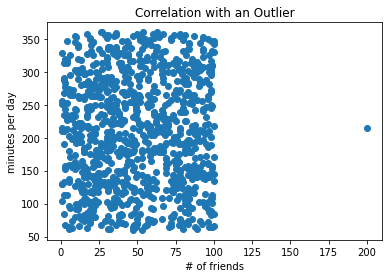

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(num_friends_large, daily_minutes)
plt.title("Correlation with an Outlier")
plt.xlabel("# of friends")
plt.ylabel("minutes per day")
plt.show()

In [ ]:
outlier = num_friends_large.index(200)

num_friends_good = [x 
                   for i, x in enumerate(num_friends_large)
                   if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

daily_hours_good = [dm / 60 for dm in daily_minutes_good]



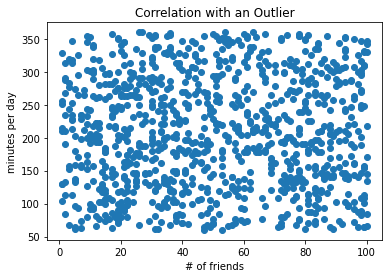

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(num_friends_good, daily_minutes_good)
plt.title("Correlation with an Outlier")
plt.xlabel("# of friends")
plt.ylabel("minutes per day")
plt.show()

**Simpson's Paradox**

correlations can be misleading when confounding variables are ignored

The only real way to avoid this is by knowing your data and by doing what you can to make sure you've checked for possible confounding factors.

**Correlation and Causation**

correlation is not causation

If **x and y are strongly correlated**, that might mean that x causes y, that y causes x, that each causes the other, that some third factor causes both, o r nothing at all. 

# <center><b>Chapter 6. Probablility</b></center>

For our purposes you should think of **probability as a way of quantifying the uncertainty associated with events chosen from some universe of events.**

**The universe consists of all possible outcomes.**

Notationally, we write **P(E**) to mean "**the probability of the event E.**"

We'll use probability theory to build models. 

We'll use probability theory to evaluate models.

We'll use probability theory all over the place.

**Dependence and Independence**

Roughly speaking, we say that **two events E and F are dependent** if **knowing** something about whether **E** happens **gives us information about whether F happens** (and vice versa). Otherwise, they are independent.

For instance, if we **flip a fair coin twice**, knowing whether the **first flip is heads gives us no information about whether the second flip is heads**. **These events are independent**.

 On the other hand, knowing whether the **first flip is heads certainly gives us information about wheter both flips are tails**. (If the first flip is heads, then definitely it's not the case that both flips are tails.) **These two events are dependent**.

Mathematically, we say that **two events E and F are independent** if the probability that they both happen is the **product of the probabilities that each one happens**:

$$P\left(E,\:F\right)\:=\:P\left(E\right)P\left(F\right)$$


In the example, the probability of "first flip heads" is 1/2, and the probability of "both filips tails" is  1/4, but the probability of "first flip heads and both flips tails" is 0.


## **Conditional Probability**

When two events **E and F are independent**, then by definition we have:

$$P\left(E,\:F\right)\:=\:P\left(E\right)P\left(F\right)$$

If they are not necessarily independent (and if the probability of F is not zero), then we define the probability of E "conditional on F" as

$$P\left(E\:|\:F\right)\:=\:\:P\left(E,F\right)/\:P\left(F\right)$$

You should think of this as the probability that E happens, given that we know the F happens.

We often rewrite this as:

$$P\left(E,F\right)\:=\:P\left(E\:|\:F\right)\:P\left(F\right)$$

When E and F are independent, you can check that this gives:

$$\:P\left(E\:|\:F\right)\:=\:\:P\left(E\right)$$

Which is the mathematical way of expressing that knowing F occured gives un no additional information about whether E occurred.

**Ex. A family with two (unknown) children.**

* Each child is equally likely to be a boy or a girl. 
* The gender of the second child is independent of the gender of the first child.



In [ ]:
 #            b              g          <-------- older child
 #         /    \         /    \
 #        b      g       b      g       <-------- second child
 #        |      |       |      |
 #        bb     bg      gb     gg

Then the event "no girls" has probability 1/4, the event "one girl, one boy" has probability 1/2 ,and the evet "two girls" has probability 1/4.

Now we can ask what is the probability of the event "both children are girls" (B) conditional on the  event "the older child is a girl" (G) ? Using the definition of conditinal probability:

$$\:P\left(B\:|\:G\right)\:=\:\:P\left(B,G\right)/P\left(G\right)\:=\:P\left(B\right)/P\left(G\right)\:=\:1/2$$

> 1/4 / 1/2 = 1/2

Since the event B and G("both children are girls and the older child is a girl") is just the event B. (Once you know that both children are girls, it's necessarily true that the older child is a girl.)

Most likely this result accords with your intuition.

We could also ask about the probability of the event "both children are girls" conditional on the event "at least one of the children is a girl" (L). Surprisingly, the answer is different from before!

As before, the event B and L ("both children are girls and at least one of the children is a girl") is just the event B. This means we have

$$\:P\left(B\:|\:L\right)\:=\:\:P\left(B,L\right)\:/P\left(L\right)\:=\:P\left(B\right)/P\left(L\right)\:=\:1/3$$

> 1/4 / 3/4  = 3/4

How can this be the case? Well, if all you know is that at least one of the children is a girl, then it is twice as likely that the family has one boy and one girl than that it has both girls.

In [ ]:
import enum, random

# An Enum is atyped set of enumerated values, We can use them
# to make our code more descriptive and readable.

class Kid(enum.Enum):
  BOY = 0
  GIRL = 1


def random_kid() -> Kid:
  return random.choice([Kid.BOY, Kid.GIRL])


both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):            # in 10000 random families who have 2 children
  younger = random_kid()
  older = random_kid()
  if older == Kid.GIRL:
    older_girl += 1
  if older == Kid.GIRL and younger == Kid.GIRL:
    both_girls += 1
  if older == Kid.GIRL or younger == Kid.GIRL:
    either_girl += 1

# print(older_girl)
# print(both_girls)
# print(either_girl)

print("P(both | older):",both_girls/ older_girl)
print("P(both | either):", both_girls / either_girl)

P(both | older): 0.5007089325501317
P(both | either): 0.3311897106109325


## **Bayes's Theorem**

Bayes's theorem is a way of **"reversing"** conditional probabilities.

Let's ssay we need to know the probability of some event E conditional on some other event F occurring. But we only have information about the probability of F conditional on E occurring. Using the definition of conditional probability twice tells us that:

$$\:P\left(E\:|\:F\right)\:=\:\:P\left(E,F\right)\:/P\left(F\right)\:=\:P\left(F|\:E\right)P\left(E\right)/P\left(F\right)$$

The event F can be split into the two mutually exclusive events "F and E" and "F and not E." If we write ¬E for "not E" (i.e., "E doesn't happen"), then:

$$P\left(F\right)\:=\:P\left(F,E\right)+\:P\left(F,\neg E\right)$$

so that:

$$\:P\left(E\:|\:F\right)\:=\:P\left(F\:|\:E\right)P\left(E\right)/\left[P\left(F\:|\:E\right)P\left(E\right)\:+P\left(F\:\:|\:\neg E\right)P\left(\neg E\right)\right]$$

Which is how Bayes's theorem is often stated.

Imagine a certain disease that affects 1 in every 10,00 people. And imagine that there is a test for this disease that gives the correct result ("diseased" if you have the disease, "nondiseased" if you don't) 99% of the time.

What does a positive test mean? Let's use T for the event "your test is positive" and D for the event "you have the disease." Then Bayes's theorem says that the probability that you have the disease, conditional on testing positive, is:

$$\:P\left(D\:|\:T\right)\:=\:P\left(T|\:D\right)P\left(D\right)/\left[P\left(T|\:D\right)P\left(D\right)+P\left(T\:|\neg D\right)P\left(\neg D\right)\right]$$

Here we know hta P(T|D), the probanbility that someone with the disease tests positive, is 0.99. P(D), the probability that any given person has the disease, is 1/10,000 = 0.0001. P(T|¬D), the probability that osmeone without the disease tests positive, is 0.01. And P(¬D), the probability that any given person doesn't have the disease, is 0.9999. If you substitute these numbers into Bayes's theorem, you find:

$$\:P\left(D\:|\:T\right)\:=\:0.98\%$$

That is, less than 1% of the people who test positive actually have the disease.

A more intuitive way to see this is to imagine a population of 1 million people. You'd expect 100 of them to have the disease, and 99 of those 100 to test positive. On the other hand, you'd epect 999,900 of them not ot have the disease, and 9,999 of those to test positive. That means you'd expect only 99 out of (99 + 9999) positive tester to actually have the disease.

**Random Variables**

A random variable is a **variable whose possible values have an associated probability distribution**. 
- A very simple random variable equals 1 if a coin flip turns up heas and 0 if the flip turns up tials. A more complicated one might measure the number of heads you observe when flipping a coin 10 times or a value picked from range(10) where each number is equally likely.

The associated distribution gives the **probabilities that the vaiable realizes each of its possible values**. 
  - The coin flip variable equals 0 with probability 0.5 and 1 with probability 0.5. The range(10) variable has a distribution that assigns probability 0.5. The range(10) variable has a distribution that assigns probability 0.1 to each of the numbers from 0 to 9.

We will sometimes talk about the **expected value of a random variable, which is the average of its values weighted by their probabilities**.
  - The coin flip variable has an expected value of 1/2 (= 0 * 1/2 + 1 * 1/2), and the range (10) variable has an expected value of 4.5

Random variables can be conditioned on events just as other events can.
  - In two-child example, if X is the random variable representing the number of girls, X equals 0 (gg) with probability 1/4, 1 (g|b) with probability 1/2, and 2 (bb) with probability 1/4.
  - We can define a new random variable Y that gives the number of girls conditional on at least one of the children being a girl. Then Y eals 1 wiht probability 2/3 and 2 2ith probability 1/3. And a variable Z that's the number of girls conditional on the older child being a girl equals 1 with probability 1/2 and 2 with probability 1/2. 

For the most part, we will be using random variables implicitly in what we do without calling special attention to them. But if you look deeply you'll see them.

## **Continuous Distributions**

A coin flip corresponds to a **discrete distribution** -one that associates positive probability with **discrete outcomes**.  

Often we'll want to **model distributions across a continuum of outcomes**. (For our purposes, these outcomes will always be real numbers, although that's not always the case in real life.) For example, the uniform distribution puts equal weight on all the numbers between 0 and 1.

Because there are **infinitely many numbers between 0 and 1**, this means that the weight it assigns to individual points must necessarily be zero. For this reason, we represent **a continuous distributon with a probability density function** (PDF) such that the probability of seeing a value in a certain interval equals the integral of the density function over the interval.

In [ ]:
# The density function for the uniform distribution is

def uniform_pdf(x: float) -> float:
  return 1 if 0 <= x < 1 else 0                       # discrete outcomes  

In [ ]:
# Cumulative distribution function (CDF)
# gives the probability that a random variable is 
# less than or equal to a certain value.

def uniform_cdf(x: float) -> float:
  """Returns the probability that a uniform random vairable is <= x"""
  if x < 0 :   return 0   # uniform frandom is never less than 0
  elif x < 1 : return x   # e.g. P(X <= 0.4) = 0.4
  else:        return 1   # uniform random is always less than 1

## **The Normal Distribution**

The normal distribution is the classic **bell curve-shaped distribution** and is completely determined by two parameters: 
 - its **mean μ (mu)** and 
 - its **standard deviation σ (sigma)**. 
 
The **mean** indicates where the bell is **centered**, and the **standard deviation** how **"wide"** it is.

$$\:f\:\left(x|μ,\:σ\right)\:=\:\frac{1}{\sqrt{2\pi }σ}exp\left(−\frac{\left(x\:−\:μ\right)^2}{2σ^2}\:\right)$$

In [ ]:
import math


SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
  return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

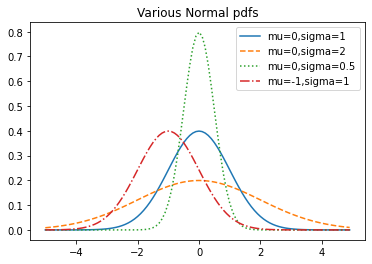

In [ ]:
import matplotlib.pyplot as plt


xs = [x / 10.0 for x in range(-50, 50)]

plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs],'-', label='mu=0,sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs],'--', label='mu=0,sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs],':', label='mu=0,sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs],'-.', label='mu=-1,sigma=1')

plt.legend()
plt.title("Various Normal pdfs")
plt.show()

When μ = 0 and σ = 1, it's called the **standard normal distribution**. If Z is a standard normal random variable, then it turns out that:

$$X\:=\:σZ\:+\:μ$$

is also normal but with mean μ and standard deviation σ. Conversely, if X is a normal random variable with mean μ and standard deviation σ is **a standard normal variable**. 

$$Z\:=\:\frac{\left(X\:−\:μ\right)}{σ}$$

In [ ]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
  return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

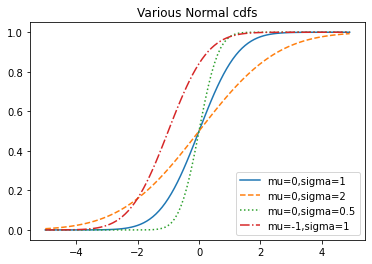

In [ ]:
xs = [x / 10.0 for x in range(-50, 50)]

plt.plot(xs, [normal_cdf(x,sigma=1) for x in xs], '-', label='mu=0,sigma=1')
plt.plot(xs, [normal_cdf(x,sigma=2) for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs, [normal_cdf(x,sigma=0.5) for x in xs], ':', label='mu=0,sigma=0.5')
plt.plot(xs, [normal_cdf(x,mu=-1) for x in xs], '-.', label='mu=-1,sigma=1')

plt.legend(loc=4)             # bottom right
plt.title("Various Normal cdfs")
plt.show()

In [ ]:
def inverse_normal_cdf(p: float, 
                       mu: float = 0,
                       sigma: float = 1,
                       tolerance: float = 0.00001) -> float:
  """Find approximate inverse using binary search"""

  # if not standard, compute standard and rescale
  if mu != 0 or sigma != 1:
    return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
  
  low_z = -10.0       # normal_cdf(-10) is (very close to) 0
  hi_z = 10.0         # normal_cdf(10)  is (very close to) 1

  while hi_z - low_z > tolerance:
    mid_z = (low_z + hi_z) / 2       # Consider the midpoint
    mid_p = normal_cdf(mid_z)        # and the CDF's value there
    if mid_p < p:
      low_z = mid_z                  # Midpoint too low, search above it
    else: 
      hi_z = mid_z                   # MIdpoint too high, search below it
 
  return mid_z  

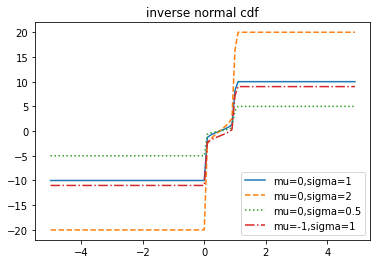

In [ ]:
xs = [x / 10.0 for x in range(-50, 50)]

plt.plot(xs, [inverse_normal_cdf(x,sigma=1) for x in xs], '-', label='mu=0,sigma=1')
plt.plot(xs, [inverse_normal_cdf(x,sigma=2) for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs, [inverse_normal_cdf(x,sigma=0.5) for x in xs], ':', label='mu=0,sigma=0.5')
plt.plot(xs, [inverse_normal_cdf(x,mu=-1) for x in xs], '-.', label='mu=-1,sigma=1')

plt.legend(loc=4)             # bottom right
plt.title("inverse normal cdf")
plt.show()

## **The Central Limit Theorem**

One reason the normal distribution is so useful is the **central limit theorem**, which says (in essence) that a random variable defined as **the average of large number of independent** and **identically distributed random variables** is itself approximately **normally distributed**

In particular, if x<sub>1</sub>,...,x<sub>n</sub> are random variables with mean μ and standard deviation σ, and if n is large, then:

$$\frac{1}{n}\left(x_1+...+x_n\right)$$

is approximately normally distributed with mean μ  and standard deviaton σ/√n. Equivalently (but often more usefully),

$$\frac{\left(x_1+...+x_n\right)\:-μn}{σ\sqrt{n}}$$

is approximately normally distributed with mean 0 and standard deviation 1.


An easy way to illustrate this is by looking at binomial random variables, which have two parameters n and p. A Binomial(n,p) random variable is simply the sum of n independent Bernoulli(p) random variables, each of which equals 1 with probability p and 0 with probability 1-p:

In [ ]:
def bernoulli_trial(p: float) -> int:
  """Returns 1 with probability p and 0 with probability 1-p"""
  return 1 if random.random() < p else 0


def binomial(n: int, p: float) -> int:
  """Returns the sum of n bernoulli(p) trails"""
  return sum(bernoulli_trial(p) for _ in range(n))

In [ ]:
from collections import Counter


def binomal_histogram(p: float, n: int, num_points: int) -> None:
  """Picks points from a Binomial(n, p) and plots their histogram"""
  data = [binomial(n, p) for _ in range(num_points)]

  # use a bar chart to show the actual binomial samples
  histogram = Counter(data)
  plt.bar([x - 0.4 for x in histogram.keys()],
          [v / num_points for v in histogram.values()],
          0.8,
          color='0.75')
  
  mu = p * n
  sigma = math.sqrt(n * p * (1 - p))

  # use a line chart to show the normal approximation
  xs = range(min(data), max(data) + 1)
  ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) 
       for i in xs]
  plt.plot(xs, ys)
  plt.title("Binomial Distribution vs. Normal Approximation")
  plt.show()

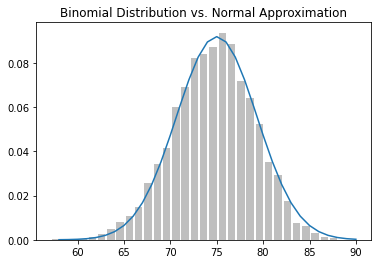

In [ ]:
binomal_histogram(0.75, 100, 10000)

# <center><b>Chapter 7. Hypothesis and Inference</b></center>

What will we do with all this statistics and probability theory?

* The science part of data science frequently involves **forming** and **testing hypotheses** about our data and the processes that generate it.

## **Statistical Hypothesis Testing**

Often, as data scientists, we'll **want to test whether a certain hypothesis is likely to be true**.

Under various assumptions, those statistics can be thought of as **observatins of random variables from known distributions**, which allows us to make statements about how likely those assumptions are to hold

In the classical setup, we have a null hypothesis, H<sub>0</sub>, that represents some default position, and some alternative hypothesis, H<sub>1</sub>, that we'd like to compare it with. We use statistics to decide whether we can reject H<sub>0</sub> as false or not. This will probably make some sense with an example.

## **Example: Flipping a Coin**

We have a coin and we want to test whether it's fair. We'll make the assumption that the coin has some probability p of landing heads, and so our null **hypothesis is that the coin is fair** -that is, that p = 0.5. We'll test this against the **alternative hypothesis p ≠ 0.5.**

In [ ]:
import requests
from pathlib import Path

data_path = Path("probability.py")

if not data_path.is_file():
  with open(data_path, "wb" ) as f:
    request = requests.get("https://raw.githubusercontent.com/joelgrus/data-science-from-scratch/master/scratch/probability.py")
    print("Downloading data")
    f.write(request.content)
else:
  print(f"{data_path} already exists")

In [ ]:
from typing import Tuple
import math


def normal_approximation_to_binomial(n: int, p: float) -> Tuple[float, float]:
  """Returns mu and sigma corresponding to a Binomial(n, p)"""
  mu = p * n
  sigma = math.sqrt(p * (1 - p) * n)
  return mu, sigma

In [ ]:
from probability import normal_cdf


# The normal cdf _is_ the probability the variable is below a threshold
normal_probability_below = normal_cdf


# It's above the threshold if it's not below the threshold
def normal_probability_above(lo: float,
                             mu: float = 0,
                             sigma: float = 1) -> float:
  """The probability that an N(mu, sigma) is greater than lo."""
  return 1 - normal_cdf(lo, mu, sigma)


# It's between if it's less than hi, but not less than lo
def normal_probability_between(lo: float,
                               hi: float,
                               mu: float = 0,
                               sigma: float = 1) -> float:
  """The probability that an N(mu, sigma) is between lo and hi."""
  return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)


# It's outside if it's not between
def normal_probability_outside(lo: float,
                               hi: float,
                               mu: float = 0,
                               sigma: float = 1) -> float:
  """The probability that  an N(mu, sigma) is not between lo and hi."""
  return 1 - normal_probability_between(lo, hi, mu, sigma)

In [ ]:
from probability import inverse_normal_cdf


def normal_upper_bound(probability: float,
                       mu: float = 0,
                       sigma: float = 1) -> float:
  """Returns the z for which P(Z <= z) = probability"""
  return inverse_normal_cdf(probability, mu, sigma)


def normal_lower_bound(probability: float,
                       mu: float = 0,
                       sigma: float = 1) -> float:
  """Returns the z for which P(Z >= z) = probability"""
  return inverse_normal_cdf(1 - probability, mu, sigma)


def normal_two_sided_bounds(probability: float,
                            mu: float = 0,
                            sigma: float = 1) -> Tuple[float, float]:
  """
  Returns the symmetric (about the mean) bounds
  that contain the specified probability
  """
  tail_probability = (1 - probability) / 2

  # upper bound should have tail_probability above it
  upper_bound = normal_lower_bound(tail_probability, mu, sigma)

  # lower bound should have tial_probability below it
  lower_bound = normal_upper_bound(tail_probability, mu, sigma)

  return lower_bound, upper_bound

In [ ]:
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)

print(mu_0)
print(sigma_0)

500.0
15.811388300841896


a type 1 error ("false positive") , in which we reject H<sub>0</sub> even though it's true.

In [ ]:
lower_bound, upper_bound = normal_two_sided_bounds(0.95, mu_0, sigma_0)

print(lower_bound)
print(upper_bound)

469.01026640487555
530.9897335951244


Assuming p really equals 0.5 (i.e., H<sub>0,</sub> is true), there is just a 5% chance we observe an X that lies outside this interval, which is the exact significance we wanted. Said differently, if H<sub>0</sub> is true, then, approximately 19 times out of 20, this test will give the correct result.

100 ----- 5, 95

20 ------ 1, 19

the power of a test, which is the probability of not making a type 2 error ("false negative"), in which we fail to reject H<sub>0</sub> even though it's false. 

In [ ]:
# 95% bounds based on assumption p is 0.5
lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)

# actual mu and sigma based on p = 0.55
mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)

# a type 2 error means we fail to reject the null hypothesis,
# which will happen when X is still in our original interval
type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
power = 1 - type_2_probability


print("lower bounds: {:.2f}, upper bounds: {:.2f}".format(lo, hi))
print("mean: {}, standard deviation: {:.2f}".format(mu_1, sigma_1))
print("type II error: {:.2f}".format(type_2_probability))
print("power: {:.2f}".format(power))

lower bounds: 469.01, upper bounds: 530.99
mean: 550.0, standard deviation: 15.73
type II error: 0.11
power: 0.89


Imagine instead that our null hypothesis was that the coin is not biased toward heads, or that p ≤ 0.5. In that case we want a one-side test that rejects the null hypothesis when X is much larger than 500 but not when X is smaller than 500. So, a 5% significance test involves using `normal_probability_below` to find the cutoff below which 95% of the probability lies:

In [ ]:
hi = normal_upper_bound(0.95, mu_0, sigma_0)
# is 526 (< 531, since we need more probability in the upper tail)

type_2_probability = normal_probability_below(hi, mu_1, sigma_1)
power = 1 - type_2_probability

print("upper bounds: {:.2f}".format(hi))
print("power: {:.2f}".format(power))

upper bounds: 526.01
power: 0.94


This is a more powerful test, since it no longer rejects H<sub>0</sub> when X is below 469 (which is very unlikely to happen if H<sub>1</sub> is true) and instead rejects H<sub>0</sub> when X is between 526 and 531 (which is somewhat likely to happen if H<sub>1</sub> is true).

## **p-Values**

An alternative way of thinking about the preding test involves p-values. Instead of choosing bounds based on some probability cutoff, we compute the probability-assuming H<sub>0</sub> is true-that we would see a value at least as extreme as the one we actually observed.



In [ ]:
def two_sided_p_value(x: float, mu: float = 0, sigma: float = 1) -> float:
  """
  How likely are we to see a value at least as extreme as x (in either
  direction) if our values are from an N(mu, sigma)?
  """
  if x >= mu:
    # x is greater than the mean, so the tail is everyting greater than x
    return 2 * normal_probability_above(x, mu, sigma)
  else:
    # x is less than the mean, so the tail is everything less than x 
    return 2 * normal_probability_below(x, mu, sigma)

In [ ]:
two_sided_p_value(529.5, mu_0, sigma_0)

0.06207721579598835

In [ ]:
import random


extreme_value_count = 0
for _ in range(1000):
  num_heads = sum(1 if random.random() < 0.5 else 0        # Count # of heads 
                  for _ in range(1000))                    # in 1000 flips,
  if num_heads >= 530 or num_heads <= 470:                 # and count how often
    extreme_value_count += 1                               # the X is 'extreme'

# p-value was 0.062 =>  ~62 extreme values out of 1000
assert 59 < extreme_value_count < 65, f"{extreme_value_count}"

In [ ]:
two_sided_p_value(531.5, mu_0, sigma_0)

0.046345287837786575

In [ ]:
upper_p_value = normal_probability_above
lower_p_value = normal_probability_below

In [ ]:
upper_p_value(524.5, mu_0, sigma_0)

0.06062885772582072

In [ ]:
upper_p_value(526.5, mu_0, sigma_0)

0.04686839508859242

## **Confidence Intervals**

We've been testing hypotheses about the value of the heads probability p, which is a parameter of the unknown "heads" distribution. When this is the case, a third approach is to construct a confidence interval around the observed value of the parameter.

For example, we can estimate the probability of the unfair coin by looking at the average value of the Bernoulli variables corresponding to each flip - 1 if heads, 0 if tails. If we observe 525 heads out of 1,000 flips, then we estimate p equals 0.525.


In [ ]:
# math.sqrt(p * (1 - p) / 1000)

In [ ]:
p_hat = 525 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000) 

print(sigma)

0.015791611697353755


In [ ]:
# 95% confident that the interval contains the parameter p

normal_two_sided_bounds(0.95, mu, sigma)

(0.4940490278129096, 0.5559509721870904)

if instead we' d seen 540 heads, then we'd have:

In [ ]:
p_hat = 540 / 1000 
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000)

print(sigma)

0.015760710643876435


In [ ]:
normal_two_sided_bounds(0.95, mu, sigma)

(0.5091095927295919, 0.5708904072704082)

## **p-Hacking**

A procedure that erroneously rejects the null hypothesis only 5% of the time will-by definition-5% of the time erroneously reject the null hypothesis:

In [ ]:
from typing import List


def run_experiment() -> List[bool]:
  """Flips a fair coin 1000 times, True = heads, False = tails"""
  return [random.random() < 0.5 for _ in range(1000)]


def reject_fairness(experiment: List[bool]) -> bool:
  """Using the 5% significance levels"""
  num_heads = len([flip for flip in experiment if flip])
  return num_heads < 469 or num_heads > 531


random.seed(0)
experiments = [run_experiment() for _ in range(1000)]
num_rejections = len([experiment
                      for experiment in experiments
                      if reject_fairness(experiment)])

assert num_rejections == 46

## **Example: Running an A/B Test**

One of your primary responsibilities at DataSciencester is **experience optimization**, which is a euphemism for trying to get people to click on advertisements. One of your advertisers has developed a new energy drink targeted at data scientists, and the VP of Advertisements wants your help choosing between advertisement A ("testes great!") and advertisement B ("less bias!")

Being a scientist, you decide to **run an experiment** by randomly showing site visitors one of the two advertisements and **tracking how many people click on each one**.

If 990 out of 1,000 A-viewers click their ad, while only 10 out of 1,000 B-viewers click their ad, you can be pretty confident that A is the better ad. But what if the differences are not so start? Here's where you'd use statistical inference.

Let's say that N<sub>A</sub> see ad A, and the n<sub>A</sub> of them click it. We can think of each ad view as a Bernoulli trial where p<sub>A</sub> is the probability that someone clicks ad A. Then (if N<sub>A</sub> is large, which it is here) we know that n<sub>A</sub>/N<sub>A</sub> is approximately a normal random variable with mean P<sub>A</sub> and standard deviation σ<sub>A</sub> =  √P<sub>A</sub> (1 − P<sub>A</sub>) / N<sub>A</sub>


Similarly, n<sub>B</sub>/N<sub>B</sub> is approximately a normal random variable with mean P<sub>B</sub> and standard deviation σ<sub>B</sub> =  √P<sub>B</sub> (1 − P<sub>B</sub>) / N<sub>B</sub>


In [ ]:
def estimated_parameters(N: int, n: int) -> Tuple[float, float]:
  p = n / N
  sigma = math.sqrt(p * (1 - p) / N)
  return p, sigma

In [ ]:
def a_b_test_statistic(N_A: int, n_A: int, N_B: int, n_B: int) -> float:
  p_A, sigma_A = estimated_parameters(N_A, n_A)
  p_B, sigma_B = estimated_parameters(N_B, n_B)
  return (p_B - p_A) / math.sqrt(sigma_A ** 2 + sigma_B ** 2)

In [ ]:
z = a_b_test_statistic(1000, 200, 1000, 180)
z

-1.1403464899034472

In [ ]:
two_sided_p_value(z)

0.2541419765422359

In [ ]:
z = a_b_test_statistic(1000, 200, 1000, 150)
z

-2.948839123097944

In [ ]:
two_sided_p_value(z)

0.003189699706216853

## **Bayesian Inference**

The procedures we've looked at have involved making probability statements about our tests: e.g., "There's only a 3% chance you'd ovserve such an extreme statistic if our null hypothesis were true."

An alternative approach to inference involves treating the unknown parameters themselves as random variables. The analyst (that's you) starts with a prior distribution for the parameters and then uses the observed data and Bayes's theorem to get an updated posterior distribution for the parameters. Rather than making probability judgemnts about the tests, you make probability judgments about the parameters.

For example, when the unknown parameter is a probability (as in our coin-flipping example), we often use a prier from the Beta distribution, which puts all its probability between 0 and 1:

In [ ]:
def B(alpha: float, beta: float) -> float:
  """A normalizing constant so that the total probability is 1"""
  return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)


def beta_pdf(x: float, alpha: float, beta: float) -> float:
  if x <= 0 or x >= 1:
    return 0
  return x ** (alpha - 1) * (1 - x) ** (beta - 1) / B(alpha, beta)

In [ ]:
# this distribution centers its weight 

# alpha / (alpha + beta)

Using Bayesian inference to test hypotheses is **considered somewhat
controversial**-in part because the mathematics can get somewhat
complicated, and in part because of the subjective nature of choosing a
prior

# <center><b>Chapter 8. Gradient Descent</b></center>

Frequently when doing data science, we'll be tryng to the **find the best model for a certain situation**. And usually **"best"** will mean something like **"minimizes the error of its predictions"** or **"maximizes the likelihood of the data."** In other words, it will represent the solution to some sort of **optimization problem**.

This means we'll need to solve a number of optimization problems. And in particular, we'll need to solve them from scratch. Our approach will be a technique called **gradient descent**, which lends itself pretty well to a from scratch treatment. You might not find it super-exciting in and of itself, but it will enable us to do exciting things throughout the book, so bear with me.

## **The Idea Behind Gradient Descent**

In [ ]:
import requests
from pathlib import Path

data_path = Path("linear_algebra.py")

if not data_path.is_file():
  with open(data_path, "wb" ) as f:
    request = requests.get("https://raw.githubusercontent.com/joelgrus/data-science-from-scratch/master/scratch/linear_algebra.py")
    print("Downloading data")
    f.write(request.content)
else:
  print(f"{data_path} already exists")

In [ ]:
from linear_algebra import dot
from typing import List


Vector = List[float]

def sum_of_squares(v: Vector) -> float:
  """Computes the sum of squared elements in v"""
  return dot(v, v)

Acccordingly, one approach to **maximizing a function** is to:
* pick a random starting point
* compute the gradient
* take a small step in the direction of the gradient (i.e. the direction that causes the function to increase the most).
* repeat with the new starting point.

## **Estimating the Gradient**

If f is a function of one variable, its derivative at a point x measures how f(x) changes when we make a very small change to x. The derivative is defined as the limit of the difference quotients:

In [ ]:
from typing import Callable


def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
  return (f(x + h) - f(x)) / h

The derivative is the slope of the tangent line at (x, f(x)), while the difference quotient is the slope of the not-quite-tangent line that runs through (x + h, f(x + h)). As h gets smaller and smaller, the not-quite-tangent line gets closer and closer to the tangent line

In [ ]:
def square(x: float) -> float:
  return x * x

In [ ]:
def derivative(x: float) -> float:
  return 2 * x

In [ ]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]

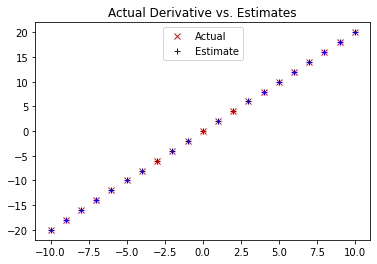

In [ ]:
# plot to show they're basically the same
import matplotlib.pyplot as plt


plt.title("Actual Derivative vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')         # red x
plt.plot(xs, estimates, 'b+', label='Estimate')     # blue +
plt.legend(loc=9)
plt.show()

When f is a function of many variables, it has multiple **partial derivatives**, each indicatin **how f changes when we make small changes in just one of the input variables**.

We calculate its ith partial derivative by treating it as a function of just its ith variable, holding the other variables fixed:

In [ ]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
  """Returns the i-th partial difference quotient of f at v"""
  w = [v_j + (h if j == i else 0)           # add h to just the ith element of v
      for j, v_j in enumerate(v)]

  return (f(w) - f(v)) /h

In [ ]:
def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
  return [partial_difference_quotient(f, v, i, h)
          for i in range(len(v))]

## **Using the Gradient**

It's easy to see that the sum_of_squares function is **smallest when tis input v is a vector of zeros**. But imagine we didn't know that. Let's use gradients to find the minimum among **all three-dimensional vectors**. We'll just pick a random starting point and then take tiny steps in the opposite direction of the gradient until we reach a point where the gradient is very small:

In [ ]:
def add(v: Vector, w: Vector) -> Vector:
    """Adds corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i + w_i for v_i, w_i in zip(v, w)]

assert add([1, 2, 3], [4, 5, 6]) == [5, 7, 9]

In [ ]:
import random
from linear_algebra import distance, scalar_multiply


def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
  """Move 'step_size' in the 'gradient' directon from v"""
  assert len(v) == len(gradient)
  step = scalar_multiply(step_size, gradient)
  return add(v, step)


def sum_of_squares_gradient(v: Vector) -> Vector:
  return [2 * v_i for v_i in v]


v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
  grad = sum_of_squares_gradient(v)    # compute the gradient at v
  v = gradient_step(v, grad, -0.01)    # take a negative gradient step
  print(epoch, v)

assert distance(v, [0, 0, 0]) < 0.001  # v should be close to 0

0 [2.4333456330979906, -7.918919165528375, 8.7092150795971]
1 [2.384678720436031, -7.760540782217808, 8.535030778005158]
2 [2.33698514602731, -7.605329966573452, 8.364330162445055]
3 [2.290245443106764, -7.453223367241983, 8.197043559196155]
4 [2.2444405342446285, -7.304158899897144, 8.033102688012232]
5 [2.199551723559736, -7.158075721899201, 7.872440634251987]
6 [2.1555606890885413, -7.014914207461217, 7.714991821566947]
7 [2.1124494753067706, -6.874615923311993, 7.560691985135608]
8 [2.070200485800635, -6.737123604845753, 7.409478145432896]
9 [2.028796476084622, -6.602381132748837, 7.261288582524238]
10 [1.9882205465629297, -6.470333510093861, 7.116062810873753]
11 [1.9484561356316712, -6.340926839891983, 6.973741554656279]
12 [1.9094870129190378, -6.214108303094143, 6.834266723563153]
13 [1.871297272660657, -6.089826137032261, 6.69758138909189]
14 [1.8338713272074438, -5.968029614291615, 6.563629761310052]
15 [1.7971939006632949, -5.848669022005783, 6.432357166083851]
16 [1.7612500

## **Choosing the Right Step Size**

Althouh the rationale for moving against the gradient is clear, how far to move is not. Indeed, choosing the right step size is more of an art than a science. Popular options include:

* Using a fixed step size

* Gradually shrinking the step size over time

* At each step, choosing the step size that minimizes the value of the objective function



The last approach sounds greaat but is, in practice, a costly computation. To keep thinsg simple, we'lll mostly just use a fixed step size. The step size that "works" depends on the problem -too small, and your gradient descent will take forever; too big, and you'll take giant steps that might make the function you care about get larger or even be undefined. So we'll need to experiment.

## **Using Gradient Descent to Fit Models**

We'll using **gradient descent** to fit parameterized models to data. In the usual case, we'll have some dataset and some (hypothesized) model for the data that depends (in a differentiable way) on one or more parameters. We'll also have a **loss function that measures how well the model fits** our data. (Smallr is better.)

If we think of our data as being fixed, then our loss function tell us how good or bad any particular model parameters are. This means we can use gradient descent to find the model parameters that make the loss as small as possible. 

In [ ]:
# x range from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

In this case we know the parameters of the linear relationship between x and y, but imagine we'd like to learn them from the data. We'll use gradient descent to find the slope and intercept that minimize the average squared error.

We'll start off with a function that determines the gradient based on the error from a single data point:

In [ ]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
  slope, intercept = theta
  predicted = slope * x + intercept      # The prediction of the model
  error = (predicted - y)                # error is (predicted - actual)
  squared_error = error ** 2             # We'll minimize squared error
  grad = [2 * error * x, 2 * error]      # using its gradient
  return grad

Now, that computation was for a single data point. For the **whole dataset** we'll look at the **means squared error.** And the gradient of the mean squared error is just the mean of the individual gradients.

So, here's what we're going to do:

1. Start with a random value for theta
2. Compute the mean of the gradients
3. Adjust theta in that direction.
4. Repeat

In [ ]:
from linear_algebra import vector_mean


# Start with random values for slope and intercept
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(5000):
  # Compute the mean of the gradients
  grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
  # Take a step in that direction
  theta = gradient_step(theta, grad, -learning_rate)
  print(epoch, theta)
  
slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [32.89601357800717, -0.6664855230942853]
1 [11.392692457946122, -0.6422565384700892]
2 [25.73543187401146, -0.6395793329352029]
3 [16.16882736070142, -0.622564742395321]
4 [22.549769585669758, -0.6151507855498289]
5 [18.29368853557272, -0.6013707143930594]
6 [21.132508376058603, -0.5918742844287006]
7 [19.23902503888448, -0.5795580274837845]
8 [20.50199074103657, -0.5691598863899324]
9 [19.65960301584222, -0.557519575876116]
10 [20.221487268857363, -0.5467449337085216]
11 [19.84672124673843, -0.5354299565722472]
12 [20.096701498468896, -0.5245123754123643]
13 [19.929975588145833, -0.5133666491630707]
14 [20.041192916057568, -0.5024099402765987]
15 [19.967021915049326, -0.4913639274799879]
16 [20.01650501873462, -0.48041417770997863]
17 [19.9835107383263, -0.469436844335824]
18 [20.005528900692024, -0.458514459908826]
19 [19.990853708778513, -0.4475919020883164]
20 [20.000652984342643, -0.4367058645753612]
21 [19.99412775357888, -0.4258317998618678]
22 [19.998490956563025, -0.41498600

## **Minibatch and Stochastic Gradient Descent**

One **drawback** of the preceding approach is that we had to **evaluate the gradients on the entire dataset** before we could take a gradient step and update our parameters. In this case it was fine, because our dataset was only 100 pairs and the gradient computation was cheap.

Your models, however, will frequently have **large datasets and expensive gradient computations**. In that case you'll want to take gradient steps more often.

We can do this using a technique called **minibatch gradient descent**, in which we compute the gradient (and take a gradient step) based on a "minibatch" sampled from the large dataset:

In [ ]:
from typing import TypeVar, List, Iterator


T = TypeVar('T') # This allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
  """Generates 'batch_size'-sized minibatches from the dataset"""
  # start indexes 0, batch_size, 2 * batch_size, ...
  batch_starts = [start for start in range(0, len(dataset), batch_size)]

  if shuffle: random.shuffle(batch_starts) # shuffle the batches

  for start in batch_starts:
    end = start + batch_size
    yield dataset[start:end]

slove problem using minibatches:

In [ ]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
  for batch in minibatches(inputs, batch_size=20):
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
    theta = gradient_step(theta, grad, -learning_rate)
  print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be aboout 5"

0 [18.519144720614474, 0.5529045149651232]
1 [20.751384885930356, 0.6557536535848838]
2 [19.38810892424719, 0.6077592711503963]
3 [20.628401111558304, 0.5876274928889178]
4 [19.60170775260213, 0.6506679796519087]
5 [20.171114249180047, 0.6482164516768676]
6 [19.322856670337917, 0.6947665083457399]
7 [19.802547076495287, 0.6610517137811373]
8 [20.287791909827984, 0.6784363796978378]
9 [18.04357156350354, 0.7867545190131702]
10 [20.13924155658279, 0.8329351205891433]
11 [19.838533004877206, 0.8843940520844162]
12 [20.06290419771817, 0.9114069597244511]
13 [19.391056644668588, 0.9704274877819579]
14 [19.81716262064748, 0.9417801061641625]
15 [20.263427608553368, 0.9606303009306446]
16 [20.07137202098695, 0.9556900740977097]
17 [19.61054166264083, 0.9970913064075044]
18 [19.820502500125233, 1.2647719137827806]
19 [19.98807994294876, 1.420842019549667]
20 [20.00229707410733, 1.4431793373287174]
21 [20.041543886244636, 1.4649874795613427]
22 [19.17392270068322, 1.5110499719054489]
23 [19.894

Another variation is s**tochastic gradient descent**, in which you take gradient steps based on one training example at a time:

In [ ]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
  for x, y in inputs:
    grad = linear_gradient(x, y, theta)
    theta = gradient_step(theta, grad, -learning_rate)
  print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [20.113424779169577, -0.64539154720026]
1 [20.108557754842995, -0.4031829936808066]
2 [20.10390022759919, -0.17136611157898382]
3 [20.099442524203273, 0.05050495429049399]
4 [20.095176065984376, 0.2628569166791063]
5 [20.0910926375942, 0.46609818047648593]
6 [20.087184427752945, 0.6606196290998745]
7 [20.08344388645836, 0.8467953757117593]
8 [20.079863824913843, 1.024983482125532]
9 [20.076437369115574, 1.1955266482340812]
10 [20.07315792223206, 1.358752870898111]
11 [20.07001917192425, 1.5149760744779686]
12 [20.06701507828925, 1.6644967146157013]
13 [20.06413987941501, 1.8076023565114592]
14 [20.06138804381435, 1.9445682280407202]
15 [20.05875427041207, 2.075657748501106]
16 [20.05623347784568, 2.201123035071631]
17 [20.05382084167483, 2.3212053883195343]
18 [20.051511755055905, 2.436135757229033]
19 [20.049301695873872, 2.546135181178596]
20 [20.04718647021197, 2.651415215752277]
21 [20.045161992131337, 2.752178340696067]
22 [20.04322439084468, 2.848618348764776]
23 [20.0413698867

On this problem, **stochastic gradient descent** finds the optimal parameters in **a much smaller number of epoch.** But there are always **tradeoffs**. Basing gradient steps on small minibatches (or on single data points) allows you to take more of them, but the gradient for a single point **might lie in a very different direction** from the gradient for the dataset as a whole.

In addition, if we weren't doing our linear algebra from scratch, there would be performance gains from "vectorizing" our computations across batches rather than computing the gradient one point at a time.


# <center><b>Chapter 9. Getting Data</b></center>

In order to be a data scientist **you need data.**

A data scientist will spend time:
* accquiring
* cleaning
* transforming data

## **stadin and stdout**

In [3]:
# # egrap.py
# import sys, re

# # sys.argv is the list of command-line arguments
# # sys.argv[0] is the name of the program itself
# # sys.argv[1] will be the regex specified at the command line
# regex = sys.argv[1]

# # for every line passed into the script
# for line in sys.stdin:
#   # if it matches the regex, write it to stdout
#   if re.search(regex, line):
#     sys.stdout.write(line)

In [2]:
# # line_count.py
# import sys

# count = 0
# for line in sys.stdin:
#   count += 1

# # print goes to sys.stdout
# print(count)

0


In [ ]:
# # most_common_words.py
# import sys
# from collections import Counter

# # pass in number of words as first argument
# try:
#   num_words = int(sys.argv[1])
# except:
#   print("usage: most_common_words.py num_words")
#   sys.exit(1) # nonzero exit code indicates error

# counter = Counter(word.lower()                      # lowercase words
#                   for line in sys.stdin             
#                   for word in line.strip().split()  # split on spaces
#                   if word)                          # skip empty 'words'

# for word, count in counter.most_common(num_words):
#   sys.stdout.write(str(count))
#   sys.stdout.write("\t")
#   sys.stdout.write(word)
#   sys.stdout.write("\n")

## **Reading Files**

**The basics of Text Files**

In [22]:
from pathlib import Path

file_name = Path("reading_file.txt")

if not file_name.is_file():
  with open(file_name, "w") as f:
    f.write("""cat1
/kat/
noun
  1. a small domesticated carnivorous mammal with soft fur, a short snout, and retractable claws. It is widely kept as a pet or for catching mice, and many breeds have been developed.
  2. INFORMAL•NORTH AMERICAN
(especially among jazz enthusiasts) a man.
"this West Coast cat had managed him since the early 80s" 
verb NAUTICAL
  raise (an anchor) from the surface of the water to the cathead.
  "I kept her off the wind and sailing free until I had the anchor catted""")

In [23]:
# 'r' means read-only, it's assumed if you leave it out
file_for_reading  = open('reading_file.txt', 'r')
file_for_reading = open('reading_file.txt')

# 'w' is write -- will destroy the file if it already exists!
file_for_writing = open('writing_file.txt', 'w')

# 'a' is append -- for adding to the end of the file
file_for_appending = open('appending_file.txt', 'a')

# don't forgot to close your files when you're done
file_for_writing.close()

In [24]:
with open('reading_file.txt') as f:
  # data = function_that_gets_data_from(f)
  data = f.read()

# at this point f has already been closed, so don't try to use it 
# process(data)
print(data)

cat1
/kat/
noun
  1. a small domesticated carnivorous mammal with soft fur, a short snout, and retractable claws. It is widely kept as a pet or for catching mice, and many breeds have been developed.
  2. INFORMAL•NORTH AMERICAN
(especially among jazz enthusiasts) a man.
"this West Coast cat had managed him since the early 80s" 
verb NAUTICAL
  raise (an anchor) from the surface of the water to the cathead.
  "I kept her off the wind and sailing free until I had the anchor catted


In [28]:
# read a whole text file, iterate over the lines of the file usng for

starts_with_hash = 0

with open('reading_file.txt') as f:
  for line in f:                # look at each line in the file
    print(line)
    if re.match("^#", line):    # use a regex to see if it starts ^ with '#'
      starts_with_hash += 1     # if it does, add 1 to the count


cat1

/kat/

noun

  1. a small domesticated carnivorous mammal with soft fur, a short snout, and retractable claws. It is widely kept as a pet or for catching mice, and many breeds have been developed.

  2. INFORMAL•NORTH AMERICAN

(especially among jazz enthusiasts) a man.

"this West Coast cat had managed him since the early 80s" 

verb NAUTICAL

  raise (an anchor) from the surface of the water to the cathead.

  "I kept her off the wind and sailing free until I had the anchor catted


In [30]:
file_name = Path("email_addresses.txt")

if not file_name.is_file():        
  with open('email_addresses.txt', 'w') as f:
      f.write("nico@gmail.com\n")
      f.write("niklaust@hotmail.com\n")
      f.write("niklaust@gmail.com\n")

In [29]:
def get_domain(email_address: str) -> str:
  """Split on '@' and return the last piece"""
  return email_address.lower().split("@")[-1]

# a couple of tests
assert get_domain('joelgrus@gmail.com') == 'gmail.com'
assert get_domain('joel@m.datasciencester.com') == 'm.datasciencester.com'

In [31]:
from collections import Counter

with open('email_addresses.txt', 'r') as f:
  domain_counts = Counter(get_domain(line.strip())
                        for line in f
                        if "@" in line)

In [33]:
print(domain_counts)

Counter({'gmail.com': 2, 'hotmail.com': 1})


**Delimited Files**

**files** with **lots of data on each line**.

* comma-separated 
* tab-separated

each line has several fields, with a comma or a tab indicatig where one field ends and the next field starts

you should never try to parse them yourself. Instead, you should use Python's csv module

tab_delimited_stock_prices.txt

In [41]:
file_name = Path("tab_delimited_stock_prices.txt")

if not file_name.is_file():
  with open('tab_delimited_stock_prices.txt', 'w') as f:
      f.write("""6/20/2014\tAAPL\t90.91
6/20/2014\tMSFT\t41.68
6/20/2014\tFB\t64.5
6/19/2014\tAAPL\t91.86
6/19/2014\tMSFT\t41.51
6/19/2014\tFB\t64.34
""")

In [42]:
def process(date: str, symbol: str, closing_price: float) -> None:
    # Imaginge that this function actually does something.
    assert closing_price > 0.0

In [49]:
import csv

with open('tab_delimited_stock_prices.txt') as f:
  tab_reader = csv.reader(f, delimiter='\t')
  for row in tab_reader:
    date = row[0]
    symbol = row[1]
    closing_price = float(row[2])
    process(date, symbol, closing_price)
    print(date, symbol, closing_price)

6/20/2014 AAPL 90.91
6/20/2014 MSFT 41.68
6/20/2014 FB 64.5
6/19/2014 AAPL 91.86
6/19/2014 MSFT 41.51
6/19/2014 FB 64.34


colon_delimited_stock_prices.txt

In [50]:
file_name = Path("colon_delimited_stock_prices.txt")

if not file_name.is_file():
  with open('colon_delimited_stock_prices.txt', 'w') as f:
      f.write("""date:symbol:closing_price
6/20/2014:AAPL:90.91
6/20/2014:MSFT:41.68
6/20/2014:FB:64.5
""")

In [53]:
with open('colon_delimited_stock_prices.txt') as f:
  colon_reader = csv.DictReader(f, delimiter=':')  # skip the header row with csv.DictReader, read.next
  for dict_row in colon_reader:
    date = dict_row["date"]
    symbol = dict_row["symbol"]
    closing_price = float(dict_row["closing_price"])
    process(date, symbol, closing_price)
    print(date, symbol, closing_price)

6/20/2014 AAPL 90.91
6/20/2014 MSFT 41.68
6/20/2014 FB 64.5


comma_delimited_stock_prices.txt

In [56]:
todays_prices = {'AAPL': 90.91, 'MSFT': 41.68, 'FB': 64.5}

with open('comma_delimited_stock_prices.txt', 'w') as f:
  csv_writer = csv.writer(f, delimiter=',')
  for stock, price in todays_prices.items():
    csv_writer.writerow([stock, price])

In [58]:
with open('comma_delimited_stock_prices.txt') as f:
  data = f.read()


print(data)

AAPL,90.91
MSFT,41.68
FB,64.5



bad_csv.txt  **"do not do it"**

In [59]:
results = [["test1", "success", "Monday"],
           ["test2", "success, kind of", "Tuesday"],
           ["test3", "failure, kind of", "Wednesday"],
           ["test4", "failure, utter", "Thursday"]]

In [61]:
# dont do this!

with open('bad_csv.txt', 'w') as f:
  for row in results:
    f.write(",".join(map(str, row))) # might have too many commas in it!
    f.write("\n")                     # row might have newlines as well!

In [62]:
with open('bad_csv.txt') as f:
  data = f.read()


print(data)

test1,success,Monday
test2,success, kind of,Tuesday
test3,failure, kind of,Wednesday
test4,failure, utter,Thursday



## **Scraping the Web**

**HTML and the Parsing Thereof**

    <html>
      <head>
        <title>A web page</title>
      </head>
      <body>
        <p id="author">Joel Grus</p>
        <p id="subject">Data Science</p>
      </body>
    </html>

to get data out of HTML, we will use the **Beautiful Soup library**

We'll also use the **Requests library**

In [63]:
pip install beautifulsoup4 requests html5lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


    <!doctype html>
    <html lang="en-US">
    <head>
        <title>Getting Data</title>
        <meta charset="utf-8">
    </head>
    <body>
        <h1>Getting Data</h1>
        <div class="explanation">
            This is an explanation.
        </div>
        <div class="comment">
            This is a comment.
        </div>
        <div class="content">
            <p id="p1">This is the first paragraph.</p>
            <p class="important">This is the second paragraph.</p>
        </div>
        <div class="signature">
            <span id="name">Joel</span>
            <span id="twitter">@joelgrus</span>
            <span id="email">joelgrus-at-gmail</span>
        </div>
    </body>
    </html>

In [67]:
%%html 
https://raw.githubusercontent.com/joelgrus/data/master/getting-data.html

In [112]:
from bs4 import BeautifulSoup
import requests

# I put the relevent HTML file on GitHub. In order to fit
# the URL in the book i had to split it across two lines.
# Recall the whitespace-separated strings get concatenated.
url = ("https://raw.githubusercontent.com/"
      "joelgrus/data/master/getting-data.html")

In [113]:
html = requests.get(url).text
html[:100]

'<!doctype html>\n<html lang="en-US">\n<head>\n    <title>Getting Data</title>\n    <meta charset="utf-8"'

In [110]:
soup = BeautifulSoup(html, 'html5lib')
soup

<!DOCTYPE html>
<html lang="en-US"><head>
    <title>Getting Data</title>
    <meta charset="utf-8"/>
</head>
<body>
    <h1>Getting Data</h1>
    <div class="explanation">
        This is an explanation.
    </div>
    <div class="comment">
        This is a comment.
    </div>
    <div class="content">
        <p id="p1">This is the first paragraph.</p>
        <p class="important">This is the second paragraph.</p>
    </div>
    <div class="signature">
        <span id="name">Joel</span>
        <span id="twitter">@joelgrus</span>
        <span id="email">joelgrus-at-gmail</span>
    </div>


</body></html>

find the first \<p\> tag

In [68]:
first_paragraph = soup.find('p')                     # or just soup.p
first_paragraph

<p id="p1">This is the first paragraph.</p>

get the **text contensts** of a Tag

In [77]:
first_paragraph_text = soup.p.text
first_paragraph_text

'This is the first paragraph.'

In [78]:
first_paragraph_words = soup.p.text.split()
first_paragraph_words

['This', 'is', 'the', 'first', 'paragraph.']

extract a tag's attributes

In [76]:
first_paragraph_id = soup.p['id']                  # raise KeyError if no 'id'
first_paragraph_id                               

'p1'

In [75]:
first_paragraph_id2 = soup.p.get('id')             # returns None if no 'id'
first_paragraph_id2                                # id name

'p1'

get multiple tags

In [72]:
all_paragraphs = soup.find_all('p')                 # or just soup('p')
all_paragraphs

[<p id="p1">This is the first paragraph.</p>,
 <p class="important">This is the second paragraph.</p>]

In [74]:
paragraphs_with_ids = [p for p in soup('p') if p.get('id')]
paragraphs_with_ids

[<p id="p1">This is the first paragraph.</p>]

find tags with a specific class

In [79]:
important_paragraphs = soup('p', {'class': 'important'})
important_paragraphs

[<p class="important">This is the second paragraph.</p>]

In [80]:
important_paragraphs2 = soup('p', 'important')
important_paragraphs2

[<p class="important">This is the second paragraph.</p>]

In [81]:
important_paragraphs3 = [p for p in soup('p')
                         if 'important' in p.get('class', [])]
important_paragraphs3

[<p class="important">This is the second paragraph.</p>]

combine these methods to implement more elaborate logic

In [82]:
#  Warning: will return the same <span> multiple times
# if it sits inside multiple <div>s.
# Be more clever if that's the case.
spans_inside_divs = [span
                     for div in soup('div')         # for each <div> on the page
                     for span in div('span')]       # find each <span> inside it
spans_inside_divs

[<span id="name">Joel</span>,
 <span id="twitter">@joelgrus</span>,
 <span id="email">joelgrus-at-gmail</span>]

In [114]:
%%html
https://www.house.gov/representatives

District,Name,Party,Office Room,Phone,Committee Assignment
1st,"Carl, Jerry L.",R,1330 LHOB,(202) 225-4931,Armed Services|Natural Resources
2nd,"Moore, Barry",R,1504 LHOB,(202) 225-2901,Agriculture|Veterans' Affairs
3rd,"Rogers, Mike",R,2469 RHOB,(202) 225-3261,Armed Services
4th,"Aderholt, Robert",R,266 CHOB,(202) 225-4876,Appropriations
5th,"Brooks, Mo",R,2185 RHOB,(202) 225-4801,"Armed Services|Science, Space, and Technology"
6th,"Palmer, Gary",R,170 CHOB,(202) 225-4921,Climate Crisis|Energy and Commerce
7th,"Sewell, Terri A.",D,2201 RHOB,(202) 225-2665,Ways and Means
District,Name,Party,Office Room,Phone,Committee Assignment
At Large,"Peltola, Mary",D,2314 RHOB,(202) 225-5765,Education and Labor|Natural Resources
District,Name,Party,Office Room,Phone,Committee Assignment


In [87]:
from bs4 import BeautifulSoup
import requests

url = " https://www.house.gov/representatives"
text = requests.get(url).text
soup = BeautifulSoup(text, "html5lib")

all_urls = [a['href']                        # <a></a>: hyperlink
            for a in soup('a')
            if a.has_attr('href')]

print(len(all_urls))                # 965 for me, way too many

965


In [89]:
import re


# Must start with http:// or https://
# Must end with .house.gov or .house.gov/
regex = r"^https?://.*\.house\.gov/?$"

# Let's write some tests!
assert re.match(regex, "http://joel.house.gov")
assert re.match(regex, "https://joel.house.gov")
assert re.match(regex, "http://joel.house.gov/")
assert re.match(regex, "https://joel.house.gov/")
assert not re.match(regex, "joel.house.gov")
assert not re.match(regex, "http://joel.house.com")
assert not re.match(regex, "https://joel.house.gov/biography")

In [90]:
# And now apply
good_urls = [url for url in all_urls if re.match(regex, url)]
good_urls[:5]

['https://carl.house.gov',
 'https://barrymoore.house.gov',
 'https://mikerogers.house.gov/',
 'https://aderholt.house.gov/',
 'https://brooks.house.gov/']

In [91]:
print(len(good_urls))  

876


In [92]:
good_urls = list(set(good_urls))

print(len(good_urls))

438


In [93]:
html = requests.get('https://jayapal.house.gov').text
soup = BeautifulSoup(html, 'html5lib')

# Use a set because the links might appear multiple times.
links = {a['href'] for a in soup('a') if 'press releases' in a.text.lower()}

print(links)

{'https://jayapal.house.gov/category/news/', 'https://jayapal.house.gov/category/press-releases/'}


In [96]:
from typing import Dict, Set


press_releases: Dict[str, Set[str]] = {}

for house_url in good_urls:
  html = requests.get(house_url).text
  soup = BeautifulSoup(html, 'html5lib')
  pr_links = {a['href'] for a in soup('a') if 'press releases'
                                            in a.text.lower()}
  print(f"{house_url}: {pr_links}")
  press_releases[house_url] = pr_links
  break

https://luetkemeyer.house.gov/: {'/news/documentquery.aspx?DocumentTypeID=2270'}


In [98]:
def paragraph_mentions(text: str, keyword: str) -> bool:
  """
  Returns True if a <p> inside the text mentions {keyword}
  """
  soup = BeautifulSoup(text, 'html5lib')
  paragraphs = [p.get_text() for p in soup('p')]

  return any(keyword.lower() in paragraph.lower()
            for paragraph in paragraphs)
  
text = """<body><h1>Facebook</h1><p>Twitter</p>"""
assert paragraph_mentions(text, "twitter")               # is inside a <p>
assert not paragraph_mentions(text, "facebook")          # not inside a <p>

In [101]:
for house_url, pr_links in press_releases.items():
  for pr_link in pr_links:
    url = f"{house_url}/{pr_link}"
    text = requests.get(url).text

    if paragraph_mentions(text, 'data'):
      print(f"{house_url}")
      break                                           # done with this house_url

## **Using APIs**